# Final Project Submission
## Housing Sale Prices in King County, WA

* Student name: Isabella Lindgren
* Student pace: part time
* Scheduled project review date/time: Monday 7/29 at 8:30 am
* Instructor name: Pablo Crespo
* Blog post URL: https://medium.com/@isalindgren313/transformations-scaling-and-normalization-420b2be12300


First things first! import all necessary libraries!

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression

Read in the dataset we are analyzing and get a brief overview of the data and statistics

In [2]:
kc = pd.read_csv("kc_house_data.csv")

print(kc.head(5))
print("---------------------------------------------------------------------------------")
print(kc.describe())
print("---------------------------------------------------------------------------------")

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  

### Observations:<br>
- We have 21 columns in this dataset. <br> 
- We can already see that there are some missing values. <br>
- There are some outliers (a house has 33 bedrooms) <br>
- There is some categorical data, some columns are very '0' heavy <br>

Now that we have an idea of what our data looks like, check for missing data and the datatypes of all the columns

In [3]:
print(kc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


### Observations:

- Date and Sqft_basement are objects
- waterfront, view, yr_renovated missing data

- Target variable: price

What are these variables actually explaining? <br>
Reference: https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

- id - Unique ID for each home sold 
- date - Date of the home sale 
- price - Price of each home sold 
- bedrooms - Number of bedrooms 
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
- sqft_living - Square footage of the apartments interior living space 
- sqft_lot - Square footage of the land space 
- floors - Number of floors 
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 
- view - An index from 0 to 4 of how good the view of the property was 
- condition - An index from 1 to 5 on the condition of the apartment, 
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 
  7 has an average level of construction and design, and 11-13 have a high quality level of 
  construction and design. 
- sqft_above - The square footage of the interior housing space that is above ground level 
- sqft_basement - The square footage of the interior housing space that is below ground level 
- yr_built - The year the house was initially built 
- yr_renovated - The year of the house’s last renovation 
- zipcode - What zipcode area the house is in 
- lat - Latitude 
- long - Longitude 
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

## What is my objective for this project?

- To create an accurate model to help predict housing prices 
- Stakeholders: Homeowners
- What housing features are the best predictors of housing price in the King County, WA area?

## Let's start cleaning our data! <br>

The first step in data preprocessing is checking for duplicated rows. For this data, I checked for any duplicates in 'id' value since id values should be unique to a specific home and not repeated. Since there are repeating id values, I dropped the duplicate rows from our dataset. 

In [4]:
duplicates = kc[kc.duplicated(subset='id')]
print(len(duplicates))   # there are 177 repeating 'id' values

177


In [5]:
kc.drop_duplicates(subset='id', keep='first', inplace=True)

In [6]:
kc.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


Now we can see instead of 21597 values, we have 21420 values for most columns except for the ones missing data. <br>
Next, we check for any missing data using boolean - confirms we are missing values in waterfront, view, and yr_renovated

In [7]:
kc.isna().any() 

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [8]:
kc.isna().sum() # how many values are missing in each column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We can see that 'waterfront' and 'yr_renovated' are missing a large amount of data inputs. The variable "view" is only missing 63 values so let's tackle that one first. <br>

First let's plot a histogram of the values in the 'view' column and then check the mean, median and standard deviation with the missing values to get an idea of the distribution of the data.

mean      0.234677
median    0.000000
std       0.766459
Name: view, dtype: float64


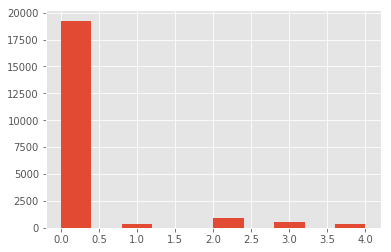

In [9]:
kc.view.hist();
print(kc.view.apply(['mean', 'median', 'std'])) 

The median is 0 and we can see the majority of values are 0. Let's find the actual percentage of the column is 0 to determine if we can use the median as a substitute for the missing values. Let's also look at the number of unique values to see if we should treat this as a categorical value.

In [10]:
print('Percentage of Null View Values:', len(kc[kc.view.isna()])/ len(kc))
print('Number of Unique View Values:', kc.view.nunique())

Percentage of Null View Values: 0.0029411764705882353
Number of Unique View Values: 5


- Very low percentage (0.2%) of null values in 'view' column
- We can treat view as categorical data
<br>
<br>
Using the median instead of the mean as a replacement makes more sense so we have less bias in our data. The most common value is 0 and the median is 0.

In [11]:
median_view = kc.view.median()
kc['view'].fillna(median_view, inplace=True)

Next, let's look at the percentage breakdown again and the mean, median, and std to see if the values have changed drastically or not. 

In [12]:
kc_median_view = kc.view.fillna(value=median_view)
print(kc_median_view.apply(['mean', 'median', 'std']))

kc.isna().sum()
print(kc.view.value_counts(normalize=True))   

mean      0.233987
median    0.000000
std       0.765437
Name: view, dtype: float64
0.0    0.901774
2.0    0.044631
3.0    0.023576
1.0    0.015359
4.0    0.014659
Name: view, dtype: float64


The mean changed a little, standard deviation is a little bit lower, median is the same, so estimation is ok. <br>
The percentage breakdown looks ok and follows the original histogram distribution. <br>
Now lets check the dataset for missing values again and double check that there are no more missing values for 'view.'

In [13]:
kc.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Now that we have successfully eliminated the missing values in for 'view,' let's do the same for 'waterfront'!

In [14]:
print('Percentage of Null Waterfront Values:', len(kc[kc.waterfront.isna()])/ len(kc))
print('Number of Unique Waterfront Values:', kc.waterfront.nunique())
# This is a categorical variable with only 2 possible values
# that is missing 2353 values which is about 11% of the data is missing

Percentage of Null Waterfront Values: 0.10985060690943044
Number of Unique Waterfront Values: 2


0.0    0.992343
1.0    0.007657
Name: waterfront, dtype: float64
---------------------------------------------------
mean      0.007657
median    0.000000
std       0.087172
Name: waterfront, dtype: float64


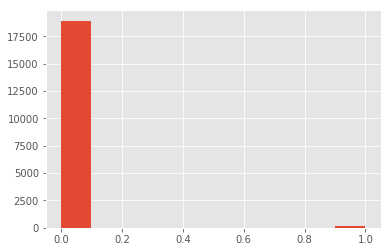

In [15]:
kc.waterfront.hist();
print(kc.waterfront.value_counts(normalize=True))
# waterfront properties only account for .007% of the values in the kc dataset

print('---------------------------------------------------')

print(kc.waterfront.apply(['mean', 'median', 'std']))
# We can deal with 'waterfront' data similarly to the 'view' data since 0 is the most frequent value and the median

In [16]:
# replace missing values in 'waterfront' column with the median value since '0' is 99% of the total values
median_waterfront = kc.waterfront.median()
kc['waterfront'].fillna(median_waterfront, inplace=True)

kc_median_waterfront = kc.waterfront.fillna(value=median_waterfront)
print(kc_median_waterfront.apply(['mean', 'median', 'std']))

# mean is slightly lower, standard deviation is also slightly lower, not a big change so substitution was ok

kc.isna().sum()
print(kc.waterfront.value_counts(normalize=True)) # check the percent breakdown of each value

mean      0.006816
median    0.000000
std       0.082280
Name: waterfront, dtype: float64
0.0    0.993184
1.0    0.006816
Name: waterfront, dtype: float64


In [17]:
#check that there are no more missing values for 'waterfront'
kc.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The last column we have to deal with is 'yr_renovated' which is a float variable. Let's check the number of unique values and see if we should treat this as a categorical variable and bin the data into age ranges (by decade)

In [18]:
print('Percentage of Null yr_renovated Values:', len(kc[kc.yr_renovated.isna()])/ len(kc))
print('Number of Unique yr_renovated Values:', kc.yr_renovated.nunique())

# 17% of data is missing
print('---------------------------------------------------')

print(kc.yr_renovated.apply(['mean', 'median', 'std']))

Percentage of Null yr_renovated Values: 0.17759103641456583
Number of Unique yr_renovated Values: 70
---------------------------------------------------
mean       83.847241
median      0.000000
std       400.436625
Name: yr_renovated, dtype: float64


17% of the inputs are missing for yr_renovated <br>
<br>
There are 70 unique values for yr_renovated so we should change the type to 'category' and bin the data by decade in order to have a smaller number of variables. <br>
<br>
The median is 0. Let's plot a histogram to visualize the distribution and also break down the percentage of each input value in the column 'yr_renovated.


0.0       0.957993
2014.0    0.004144
2003.0    0.001760
2013.0    0.001760
2007.0    0.001703
2000.0    0.001646
2005.0    0.001646
2004.0    0.001249
2009.0    0.001192
1990.0    0.001192
1989.0    0.001135
2006.0    0.001135
2002.0    0.000965
1991.0    0.000908
1998.0    0.000908
1999.0    0.000851
2008.0    0.000851
2010.0    0.000851
2001.0    0.000851
1983.0    0.000851
1984.0    0.000851
2015.0    0.000795
1985.0    0.000795
1986.0    0.000795
1987.0    0.000795
1994.0    0.000795
1992.0    0.000738
1993.0    0.000681
1997.0    0.000681
1995.0    0.000681
            ...   
1975.0    0.000284
1964.0    0.000227
1981.0    0.000227
1965.0    0.000227
1973.0    0.000227
1963.0    0.000227
1969.0    0.000227
1978.0    0.000170
1960.0    0.000170
1958.0    0.000170
1956.0    0.000170
1955.0    0.000170
1972.0    0.000170
1945.0    0.000170
1967.0    0.000114
1940.0    0.000114
1974.0    0.000114
1962.0    0.000114
1957.0    0.000114
1951.0    0.000057
1946.0    0.000057
1959.0    0.

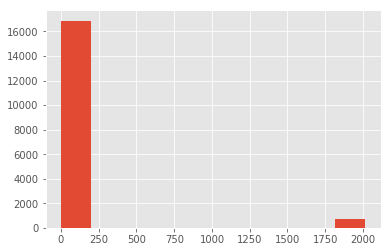

In [19]:
kc.yr_renovated.hist();
print(kc.yr_renovated.value_counts(normalize=True))

print(kc.yr_renovated.apply(['mean', 'median', 'std']))

- The histogram shows that the missing values are being input as 'NaN' and no renovation is input as '0.0'
- 95% of the data is input as 0.0 which is a majority. It seems unlikely that 95% of houses had no renovations at all in this time frame so this may mean that this data maybe just wasn't collected. Keep for now, but may not be a good variable to keep later on.
- Mean and std did not change much so the substitution is ok.

<br>
Now Let's replace the nan values with the most frequent value '0'

In [20]:
kc.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [21]:
kc['yr_renovated'] = kc['yr_renovated'].replace(np.nan, 0.0)

print(kc.yr_renovated.unique())# we can see that nan is no longer a value
kc.yr_renovated.head()

[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


0       0.0
1    1991.0
2       0.0
3       0.0
4       0.0
Name: yr_renovated, dtype: float64

We have successfully eliminated all of the missing values!! Let's double check to make sure:

In [22]:
#check if yr_renovated is missing any values - should be False 
kc.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

## Visualize and Play with the data before separating into categorical and continuous data

The question that we are trying to answer with our analysis is
>"What housing features are the best predictors of house price in the King County, WA area?"

One interesting thing to look at would be population density: 
- how close are these houses in relation to each other? This can give us a good idea of popular areas where people would like to purchase homes. 
<br>
So how can we do this? By visualizing the density of houses in relation to latitude and longitude.



C:\Users\isali\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x1080 with 0 Axes>

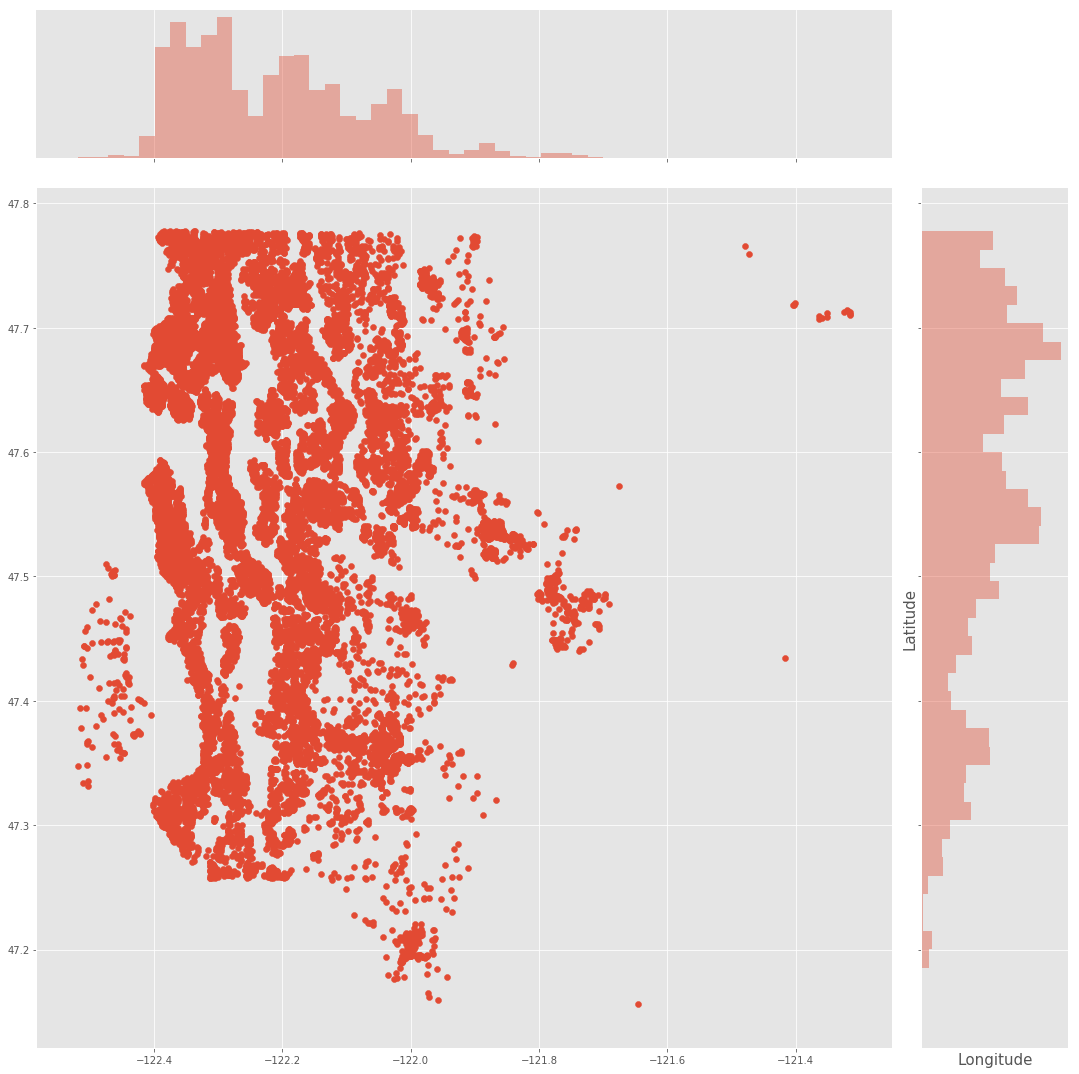

<function seaborn.distributions.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)>

In [23]:
plt.figure(figsize=(18,15))
sns.jointplot(x=kc.long.values, y=kc.lat.values, size=15)
plt.ylabel('Latitude', fontsize= 15)
plt.xlabel('Longitude', fontsize=15)

plt.show();
sns.distplot

This plot makes sense because the highest density of houses is closest to Seattle city center and then spreads out as we move further from the city. <br>

This is interesting, but we want to look at the price of the houses in relation to their geographic location in order to see which areas have the most expensive houses. Houses in popular areas tend to be higher in price.<br>

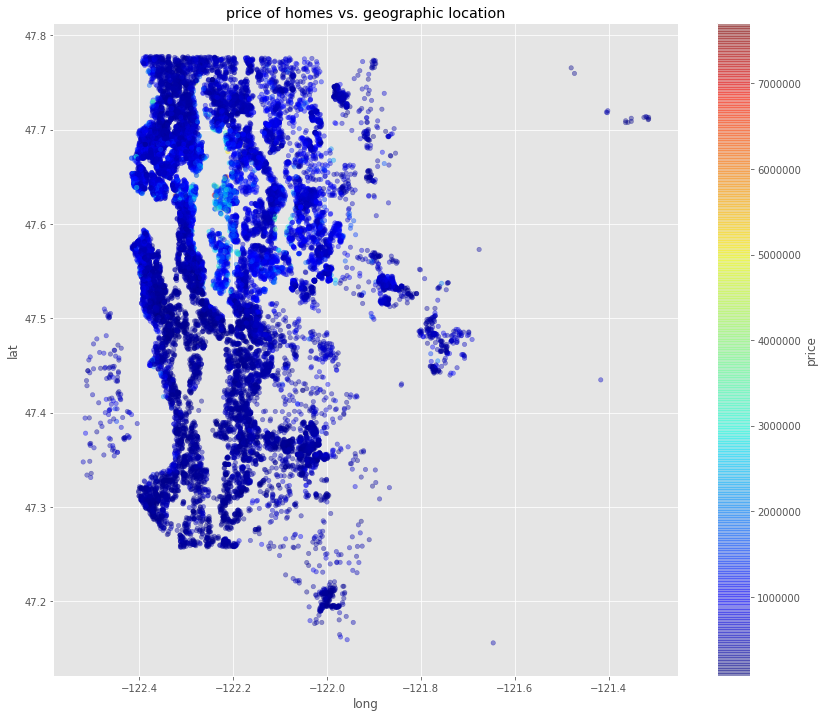

In [24]:
kc.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(14,12),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True, title='price of homes vs. geographic location',
    sharex=False);

This plot shows that in general, houses at higher latitude (around 47.6-47.7) are more expensive which makes sense since it is near Seattle city center. Let's look at these values on a scatter plot to see the distribution of prices at various degrees of latitude and longitude separately.

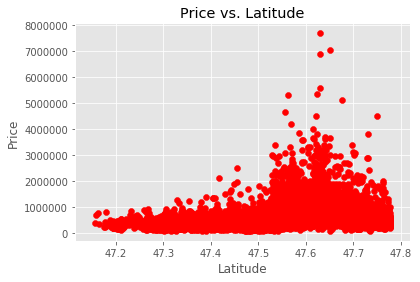

In [25]:
a = kc.price
b = kc.lat
plt.scatter(b, a, color='red');
plt.title('Price vs. Latitude')
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.show()

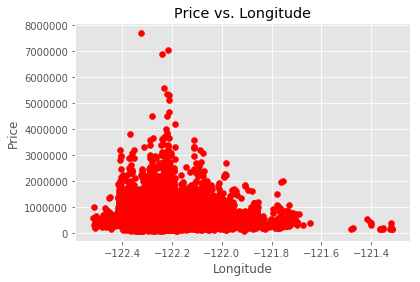

In [26]:
a = kc.price
b = kc.long
plt.scatter(b, a, color='red');
plt.title('Price vs. Longitude')
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.show()

- The most expensive houses are located around 47.6-47.7 deg lat and around -122.4 - -122.2 long
- There doesn't seem to be as wide of a range in values of longitude.
<br>

Now that we know the distribution of price geographically, let's look at a different variable.
<br>
How old are the houses that were sold from 2014-2015? This can give a good indication of up and coming developments
and which areas may be in need of renovations. 

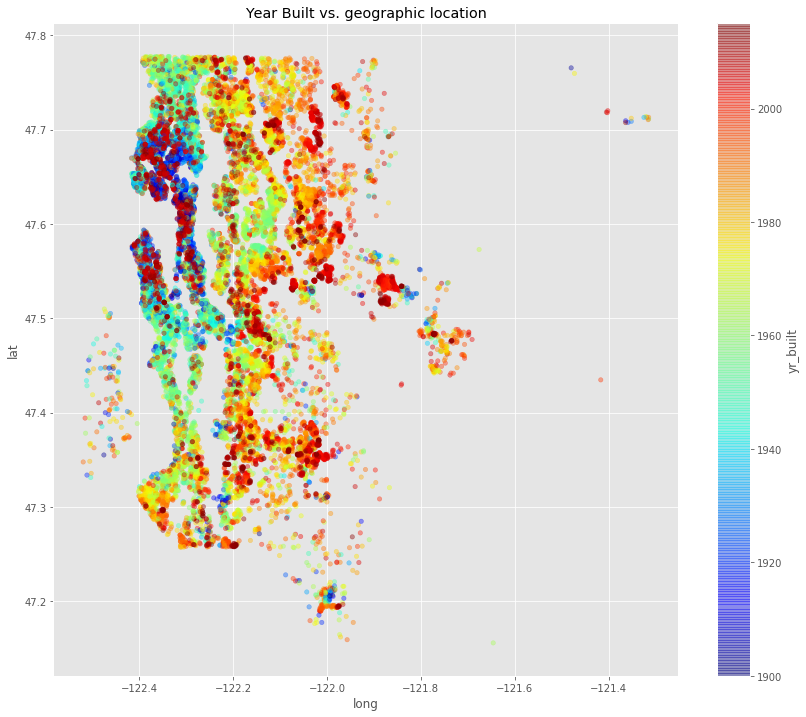

In [27]:
kc.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(14,12),
    c="yr_built", cmap=plt.get_cmap("jet"), colorbar=True, title='Year Built vs. geographic location',
    sharex=False);

Older houses were built closer to the city center and have since expanded outwards into more suburban areas
that don't have such a high housing density.
<br>
Let's have a look at Grade as well to see how this variable is distributed geographically

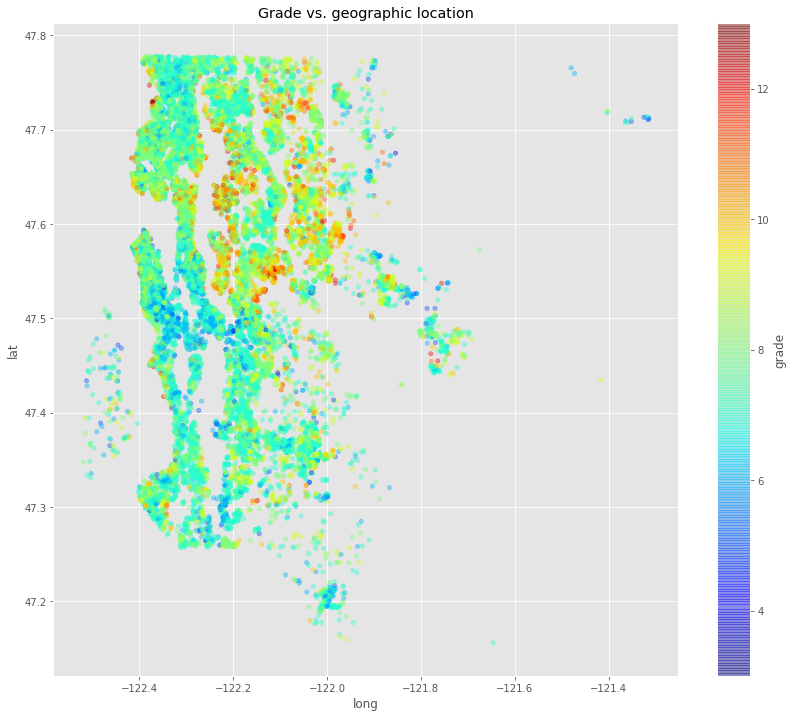

In [28]:
kc.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(14,12),
    c="grade", cmap=plt.get_cmap("jet"), colorbar=True, title='Grade vs. geographic location',
    sharex=False);

The majority of higher grade houses are located near the Seattle city center. The lower grade houses are clustered to the south of Seattle in a more spread out suburban area.
<br>
Since we see a lot of mid range houses (around grade 7). From our data cleaning we noted that there are very houses that have reported renovations. Let's see where there have been renovations geographically and what years.

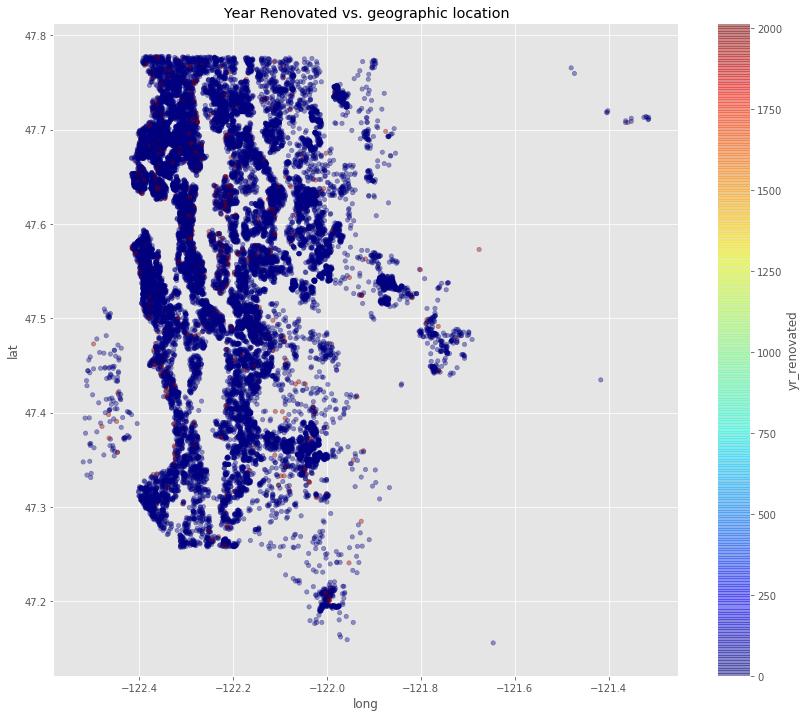

In [29]:
kc.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(14,12),
    c="yr_renovated", cmap=plt.get_cmap("jet"), colorbar=True, title='Year Renovated vs. geographic location',
    sharex=False);

We can see that there were very few renovations so this variable may not have much of an impact.
<br>
Let's look at the distribution of houses using price and Yr_built to see if price may be affected by year.

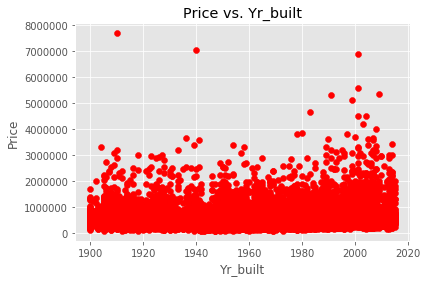

In [30]:
a = kc.price
b = kc.yr_built
plt.scatter(b, a, color='red');
plt.title('Price vs. Yr_built')
plt.xlabel("Yr_built")
plt.ylabel("Price")
plt.show()
# We can see that the price is slightly higher for newer buildings

### Now let's specify categorical and continuous data to get an idea of which variables are correlated
- Categorical data: floors, waterfront, view, condition, yr_built, yr_renovated, grade, zipcode
- Continuous data: price, date, bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, lat, long, sqft_living15, sqft_lot15
<br>
<br>
By creating a heat map of correlation, we can easily visualize what variables may be correlated so we can have an idea of what variables to eliminate in order to reduce multicollinearity in our model. 

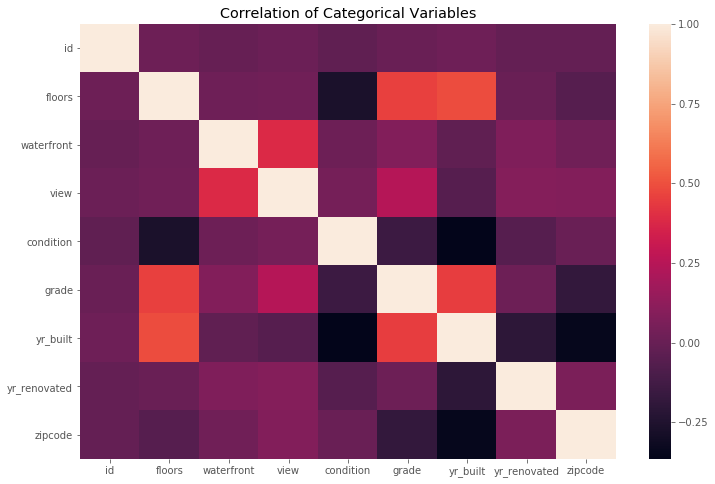

<Figure size 432x288 with 0 Axes>

In [31]:
numcols = ['price','date','bedrooms', 'bathrooms', 'sqft_living','sqft_lot','sqft_above',
           'sqft_basement', 'lat','long','sqft_living15','sqft_lot15']
catcols = [x for x in kc.columns if x not in numcols]

plt.figure(figsize = (12,8))
sns.heatmap(data=kc[catcols].corr())
plt.title('Correlation of Categorical Variables')
plt.show()
plt.gcf().clear()

# floors seems to be highly correlated with grade and yr_built
# waterfront and view appear to be correlated

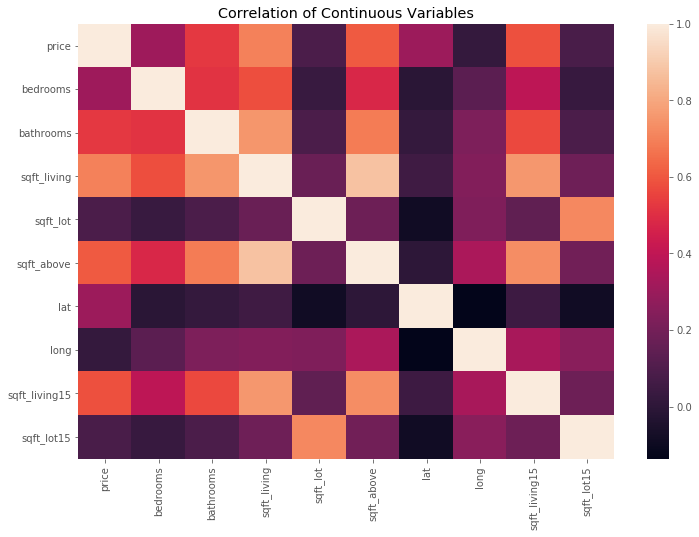

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize = (12,8))
sns.heatmap(data=kc[numcols].corr())
plt.title('Correlation of Continuous Variables')
plt.show()
plt.gcf().clear()

# our target variable 'price' seems to be highly correlated with bathrooms, sqft_living, sqft_above, sqft_living15
# bathrooms, sqft_living, sqft_above, sqft_living15 seem to be correlated with each other

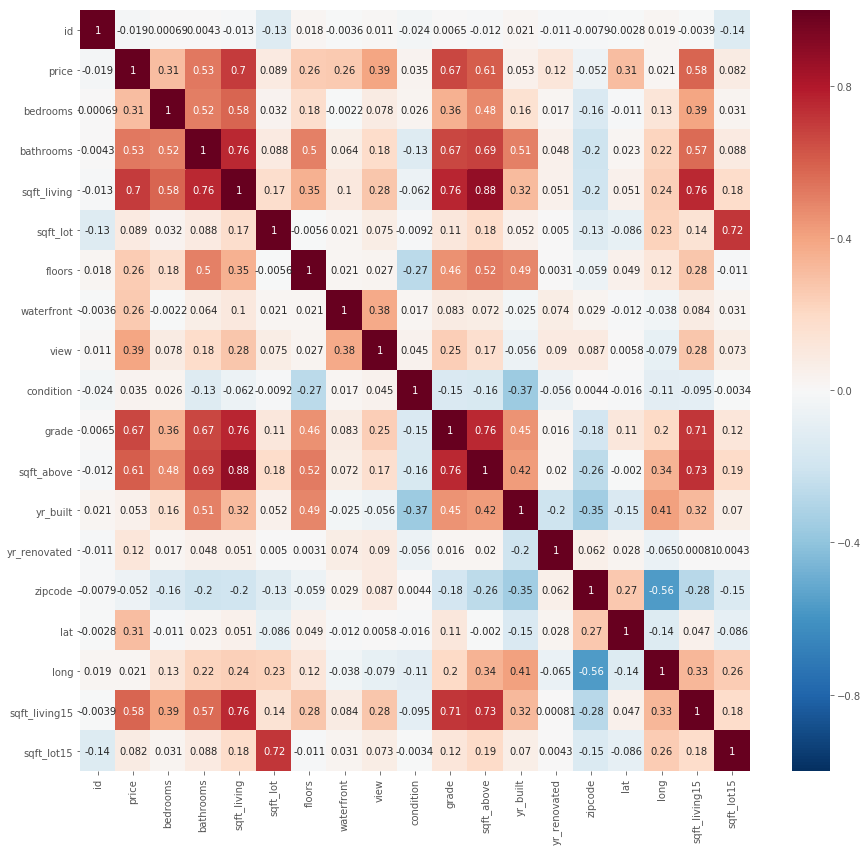

In [33]:
# Let's get a better idea of the magnitude of correlation 
correlation = kc.corr()
plt.figure(figsize=(15, 14))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

## Binning Categorical Data with many values:
<br>
Since yr_renovated is a categorical variable, lets try putting the years into bins by decade first, create bins based on the values observed. 10 values will result in 9 bins.

Note: I first tried using (0-1940] as a bin, but pd.cut would not allow this, so instead -1 is used so nan values aren't returned.

In [34]:
bins = [-1, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
bins_yr_renovated = pd.cut(kc['yr_renovated'], bins)

In [35]:
kc.yr_renovated.head(5) # We can see there are many 0 values for no renovation

0       0.0
1    1991.0
2       0.0
3       0.0
4       0.0
Name: yr_renovated, dtype: float64

In [36]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_yr_renovated = bins_yr_renovated.cat.as_unordered()
bins_yr_renovated.head()

0      (-1, 1940]
1    (1990, 2000]
2      (-1, 1940]
3      (-1, 1940]
4      (-1, 1940]
Name: yr_renovated, dtype: category
Categories (9, interval[int64]): [(-1, 1940], (1940, 1950], (1950, 1960], (1960, 1970], ..., (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]]

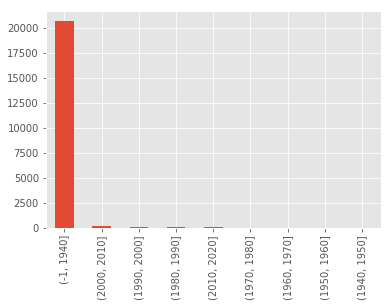

In [37]:
# plot the ordered values as a bar graph to visualize the newly created bins
# vast majority of houses have never been renovated
bins_yr_renovated.value_counts().plot(kind='bar');

Now that we have successfully binned yr_renovated into decades, let's replace the yr_renovated column in our overall dataset with our new binned data. This should change the dtype to 'category' as well.

In [38]:
kc["yr_renovated"]=bins_yr_renovated

In [39]:
# we can see that 'yr_renovated' is now listed as a dtype 'category'
kc.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     21420 non-null category
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: category(1), float64(7), int64(11), object(2)
memory usage: 3.5+ M

Let's bin the 'yr_built' category as well for consistency purposes.
First check the unique values to get an idea of what bins should be. Let's try by decade:


In [40]:
#print(kc.yr_built.value_counts())
bins = [0, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
bins_yr_built = pd.cut(kc['yr_built'], bins)

In [41]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_yr_built = bins_yr_built.cat.as_unordered()
# bins_yr_built.head()
bins_yr_built.value_counts()

(2000, 2010]    3431
(1960, 1970]    2513
(1950, 1960]    2416
(1970, 1980]    2376
(1980, 1990]    2344
(1990, 2000]    2122
(1940, 1950]    1833
(1920, 1930]    1171
(2010, 2020]    1095
(1910, 1920]     764
(1900, 1910]     687
(1930, 1940]     582
(0, 1900]         86
Name: yr_built, dtype: int64

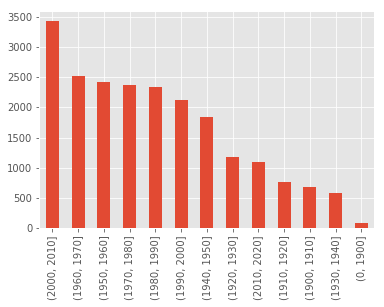

In [42]:
# Majority of houses were built from 2000-2009
bins_yr_built.value_counts().plot(kind='bar');

In [43]:
# replace the existing "yr_renovated" column
kc["yr_built"]=bins_yr_built

In [44]:
# we can see that 'yr_built' is now listed as a dtype 'category'
kc.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null category
yr_renovated     21420 non-null category
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: category(2), float64(7), int64(10), object(2)
memory usage: 3.3

## Checking for any hidden extraneous values

Now let's check for any wonky characters or out of place numbers which may mess with our model.

In [45]:
# Check all columns for extraneous values 
for col in kc.columns:
    print(col, '\n', kc[col].value_counts(normalize=True).head(), '\n\n') 

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
Name: id, dtype: float64 


date 
 6/23/2014    0.006629
6/25/2014    0.006116
6/26/2014    0.006116
7/8/2014     0.005929
4/27/2015    0.005882
Name: date, dtype: float64 


price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
Name: price, dtype: float64 


bedrooms 
 3    0.454295
4    0.319748
2    0.127731
5    0.074043
6    0.012372
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249860
1.00    0.177124
1.75    0.140990
2.25    0.094818
2.00    0.089309
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006349
1440    0.006209
1400    0.006162
1660    0.005976
1800    0.005976
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016573
6000    0.013352
4000    0.011625
7200    0.010177
7500    0.005509
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.492624
2.0    0.382960
1.5    

In [46]:
kc.sqft_basement.value_counts(normalize=True)  # We can see '?' appears 2% of the values
len(kc[(kc.sqft_basement=='?') ])   # The number of times '?' appears as a value

452

Let's try a different method of estimating our data!
Method: randomly select a class acccording to current distribution

In [47]:
kc.sqft_basement.value_counts(normalize=True)

rel_prob = [.61, .01, .0099, .0099, .0093]
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_sqft_basement(value):
    if value == '?':
        return np.random.choice(['0.0','600.0','700.0', '500.0', '800.0'], p=prob)
    else:
        return value
kc.sqft_basement = kc.sqft_basement.map(lambda x: impute_sqft_basement(x))
kc.sqft_basement.value_counts(normalize=True)  # no longer has '?'

0.0       0.613539
600.0     0.010364
500.0     0.010084
700.0     0.009804
800.0     0.009664
400.0     0.008590
1000.0    0.006816
300.0     0.006583
900.0     0.006583
480.0     0.004809
200.0     0.004809
530.0     0.004715
750.0     0.004715
450.0     0.004715
720.0     0.004575
620.0     0.004155
580.0     0.003922
840.0     0.003828
420.0     0.003782
860.0     0.003688
1100.0    0.003641
670.0     0.003595
550.0     0.003548
780.0     0.003501
240.0     0.003455
650.0     0.003455
380.0     0.003408
680.0     0.003361
360.0     0.003315
940.0     0.003315
            ...   
935.0     0.000047
1135.0    0.000047
862.0     0.000047
2300.0    0.000047
1798.0    0.000047
2400.0    0.000047
506.0     0.000047
2350.0    0.000047
2050.0    0.000047
508.0     0.000047
666.0     0.000047
3500.0    0.000047
2190.0    0.000047
1281.0    0.000047
3000.0    0.000047
2610.0    0.000047
556.0     0.000047
143.0     0.000047
1525.0    0.000047
1284.0    0.000047
283.0     0.000047
1024.0    0.

In [48]:
len(kc[(kc.sqft_basement=='?') ])   # The number of times '?' appears is now '0'

0

In [49]:
# Let's change sqft_basement from an object type to a int type
kc['sqft_basement'] = pd.to_numeric(kc['sqft_basement'])
kc['sqft_basement'].head(5)

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64

Let's visualize the distributions to see which variables are categorical and continuous

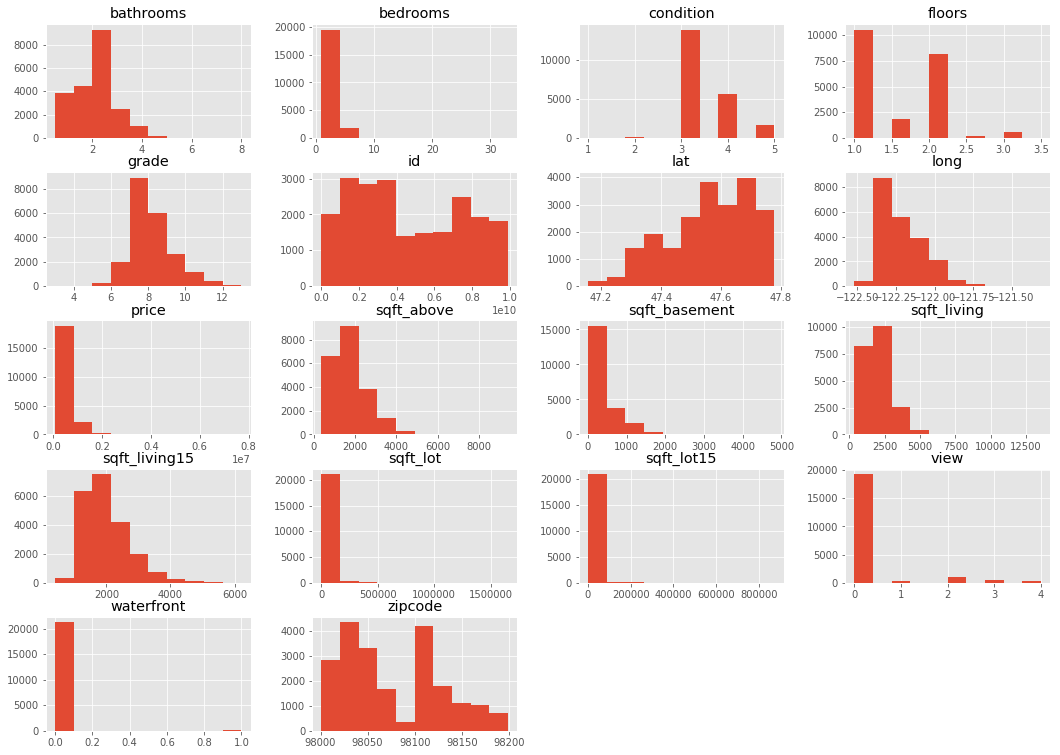

In [50]:
kc.hist(figsize=(18,13) );

# much of our data is skewed with long tails to the right. Condition, floors, view, waterfront and zipcode are categorical

The scale of the x axis for bedrooms is very high so let's check the values for any wonky numbers

In [51]:
kc = kc[kc.bedrooms != 33] # remove the row with 33 as a value in the column 'bedrooms'

In [52]:
kc.bedrooms.value_counts() #These values make more sense

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

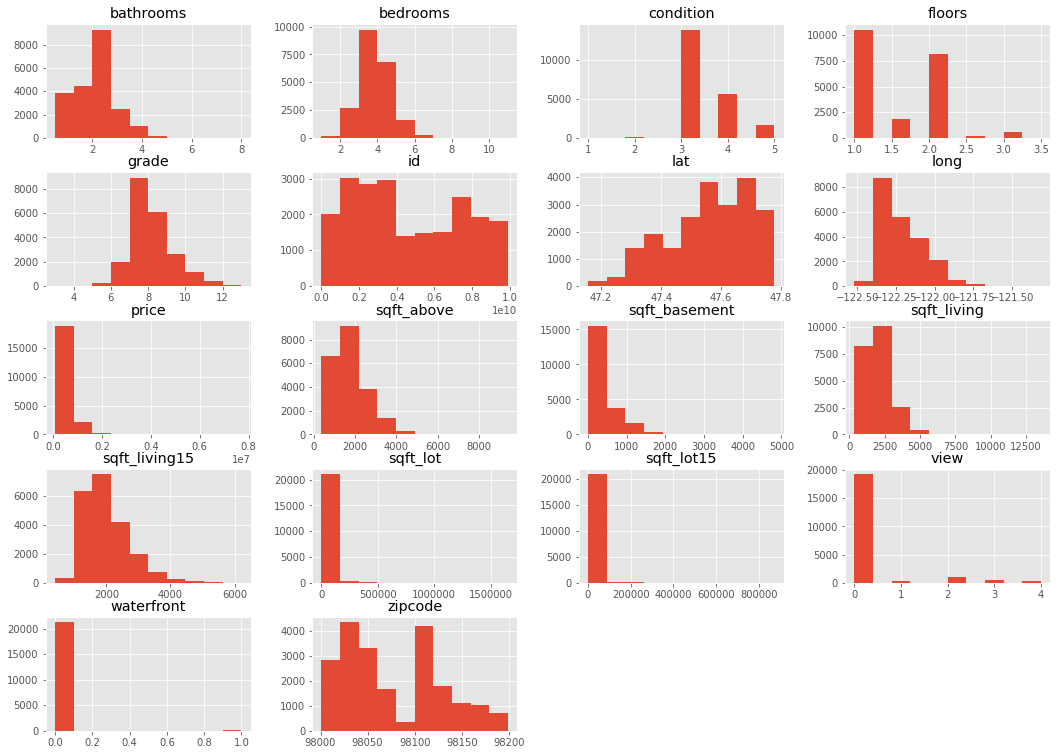

In [53]:
kc.hist(figsize=(18,13) ); # bedrooms now has a more normal distribution

### Observations:
- Average house is a 3 bedroom, 2.5 bathroom, condition3, single story, grade 7, with no waterfront, no basement
<br>
Now let's plot all the independent variables vs the target variable to visualize the relationships

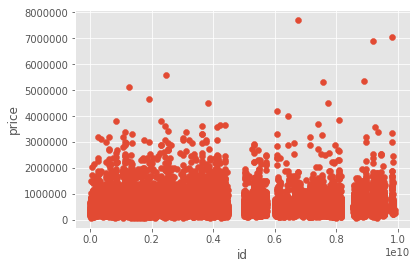

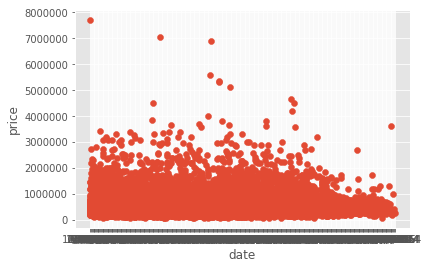

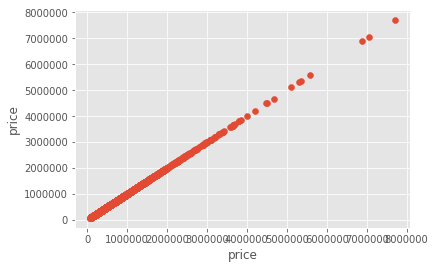

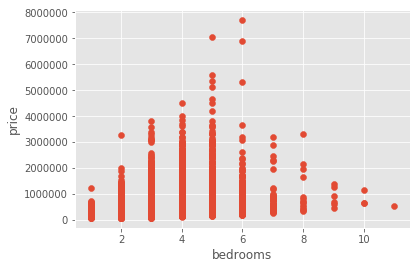

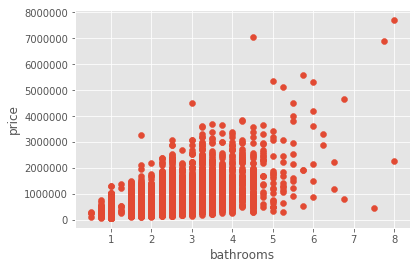

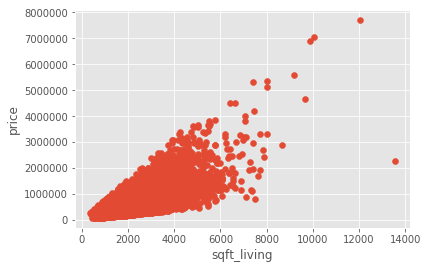

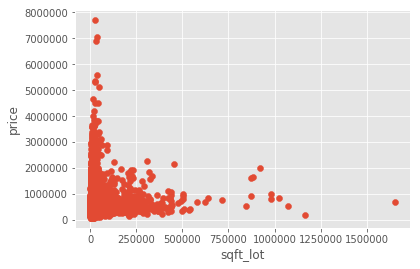

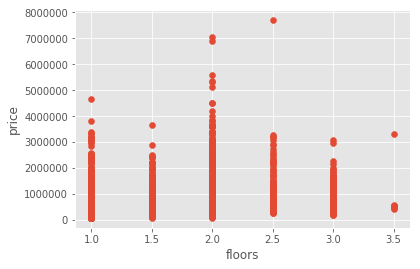

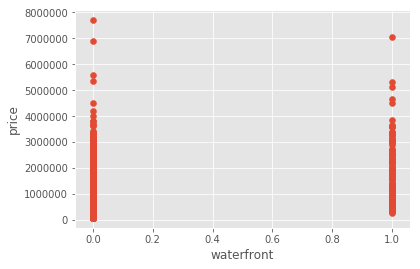

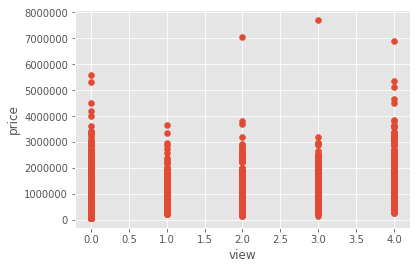

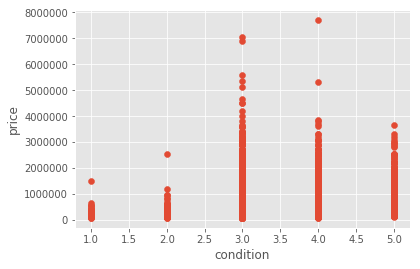

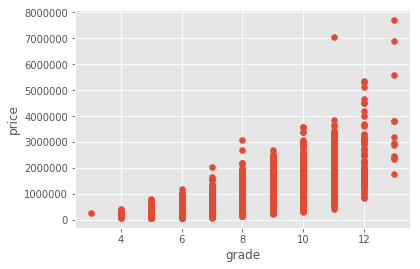

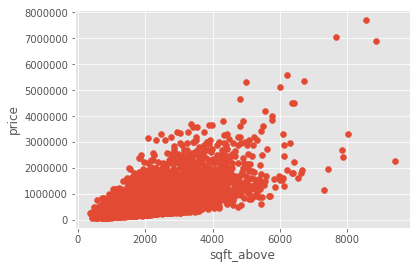

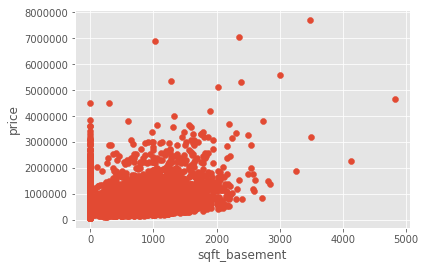

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

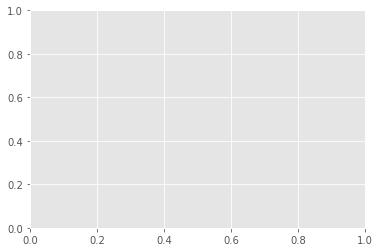

In [54]:
for i in kc:
    plt.scatter(kc[i], kc['price'])
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()

Observations:

- there seems to be some heteroskedacity for continuous variables: bathrooms, sqft_living, sqft_above, sqft_basement clear categorical data in lines
- many of the variables have skewed distributions - transforming the data may be useful
- Categorical data: bedrooms, bathrooms, floors, waterfront, view, condition, yr_built, yr_renovated, grade, zipcode
- Continuous data: date, sqft_living, sqft_lot, sqft_above, lat, long, sqft_living15, sqft_lot15

## Let's start using linear regressions

In [55]:
kc.describe() # Let's have a quick look at basic stats of our data

id         price      bedrooms     bathrooms   sqft_living  \
count  2.141900e+04  2.141900e+04  21419.000000  21419.000000  21419.000000   
mean   4.581042e+09  5.407347e+05      3.372566      2.118446   2083.154256   
std    2.876790e+09  3.679391e+05      0.903013      0.768734    918.824411   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123375e+09  3.225000e+05      3.000000      1.750000   1430.000000   
50%    3.904921e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view    condition  \
count  2.141900e+04  21419.000000  21419.000000  21419.000000  21419.00000   
mean   1.512846e+04      1.496008      0.006816      0.233998      3.41071   
std    4.153172e+04      0.540083      0.082281      0.765453      0.64996   
min    5.200000e+02      1.000000      0.000000      0.000000      1.00000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.00000   
50%    7.614000e+03      1.500000      0.000000      0.000000      3.00000   
75%    1.069200e+04      2.000000      0.000000      0.000000      4.00000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.00000   

              grade    sqft_above  sqft_basement       zipcode           lat  \
count  21419.000000  21419.000000   21419.000000  21419.000000  21419.000000   
mean       7.662823   1791.205285     286.679630  98077.873197     47.560191   
std        1.171990    828.696414     440.081448     53.478453      0.138590   
min        3.000000    370.000000       0.000000  98001.000000     47.155900   
25%        7.000000   1200.000000       0.000000  98033.000000     47.471200   
50%        7.000000   1560.000000       0.000000  98065.000000     47.572100   
75%        8.000000   2220.000000     550.000000  98117.000000     47.678050   
max       13.000000   9410.000000    4820.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21419.000000   21419.000000   21419.000000  
mean    -122.213778    1988.414819   12776.095196  
std        0.140792     685.538299   27346.204562  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.230000    1840.000000    7620.000000  
75%     -122.125000    2370.000000   10086.500000  
max     -121.315000    6210.000000  871200.000000

King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~bedrooms
-------------------------------------------------------------------------------------


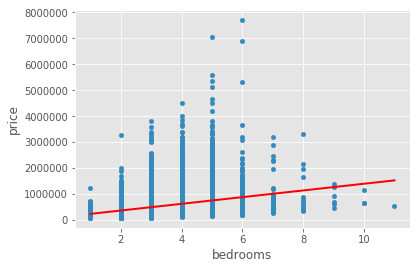

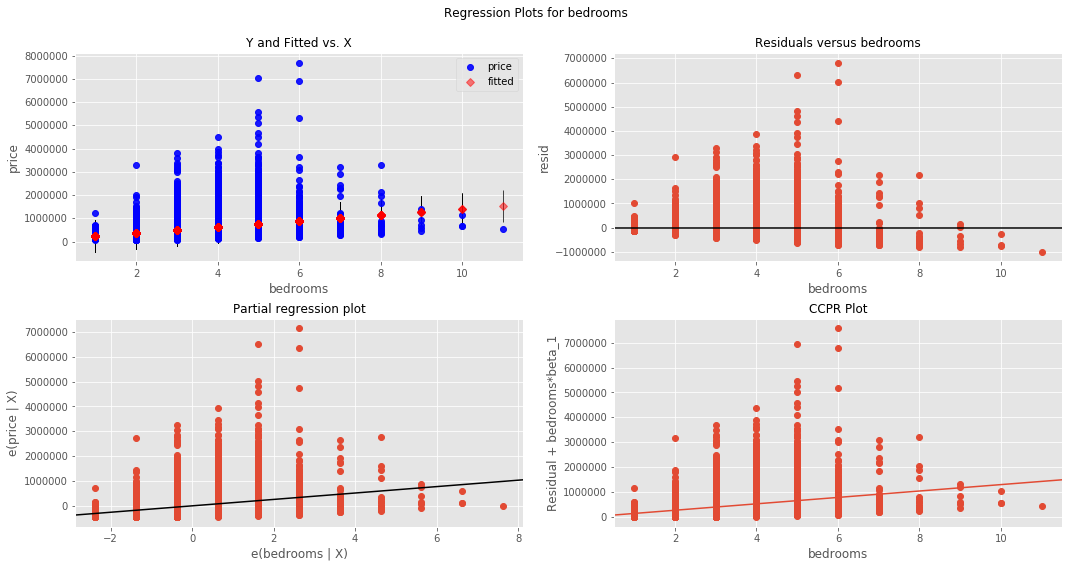

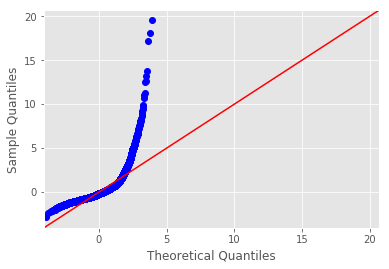

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~bathrooms
-------------------------------------------------------------------------------------


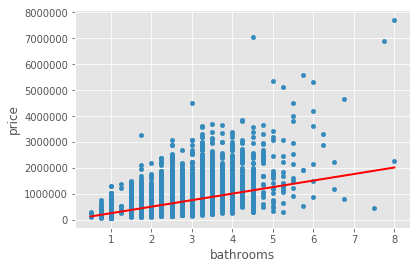

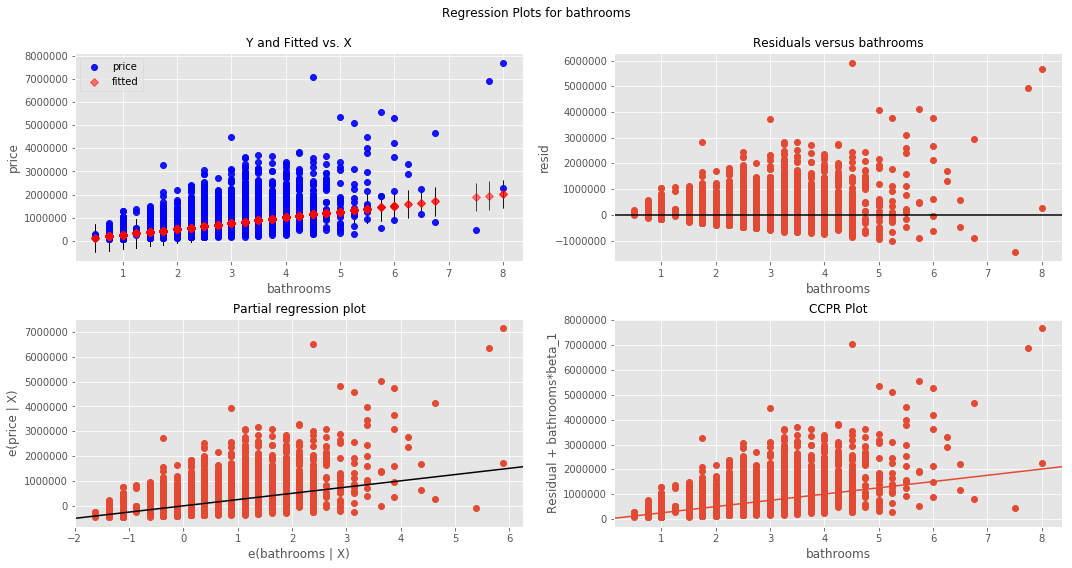

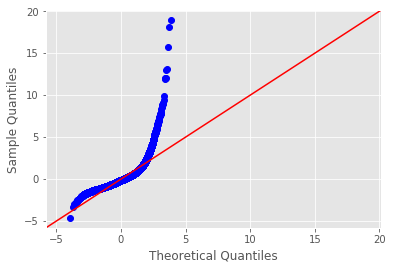

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_living
-------------------------------------------------------------------------------------


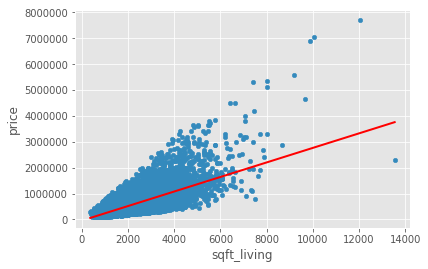

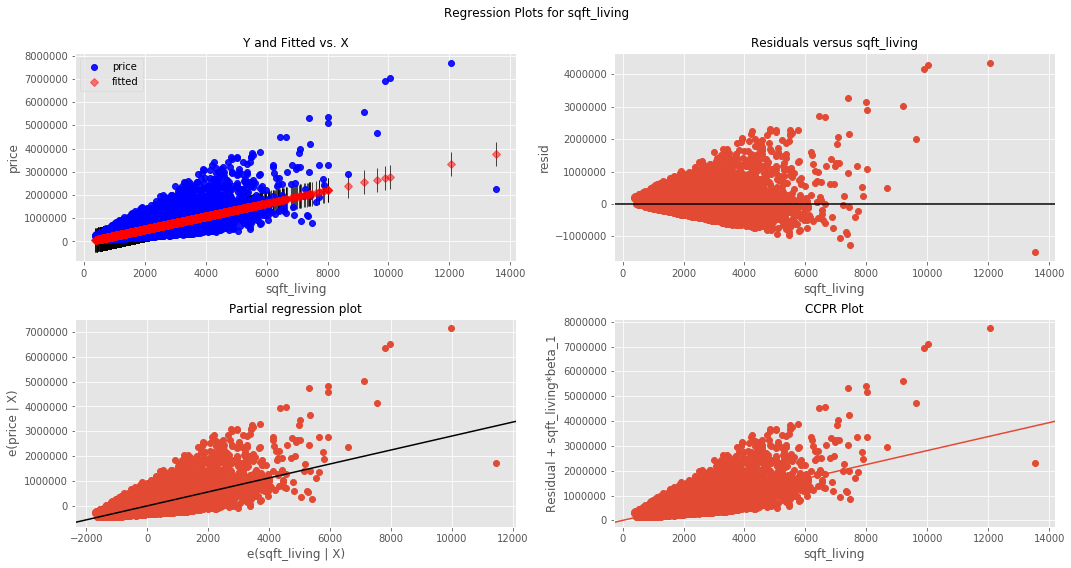

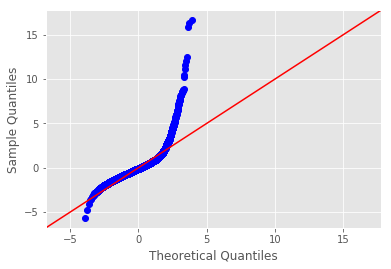

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_lot
-------------------------------------------------------------------------------------


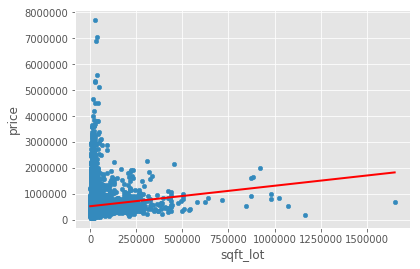

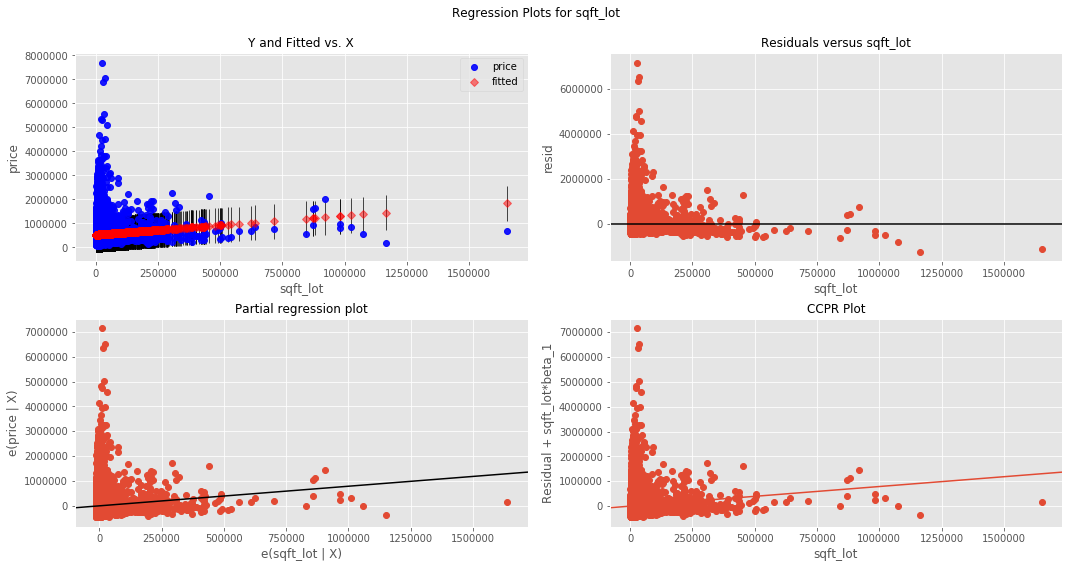

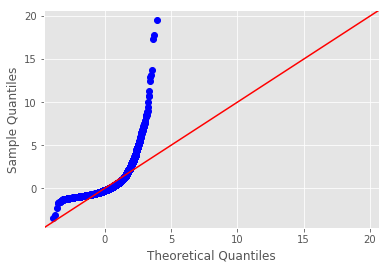

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_above
-------------------------------------------------------------------------------------


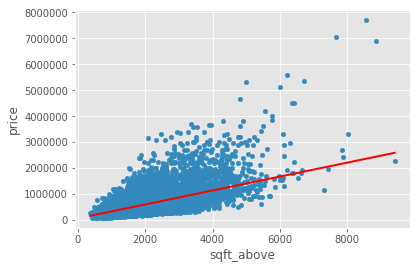

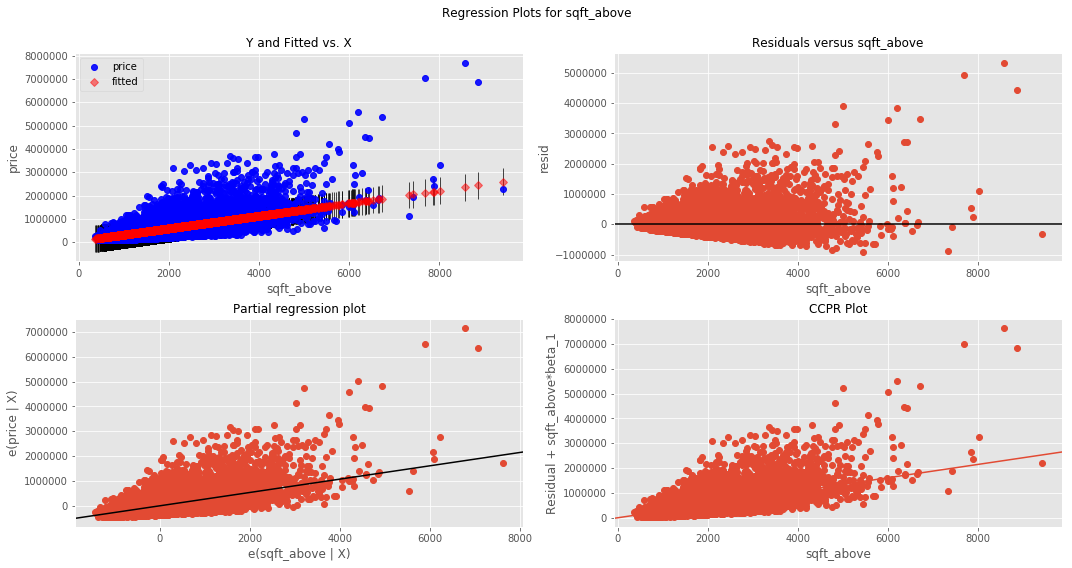

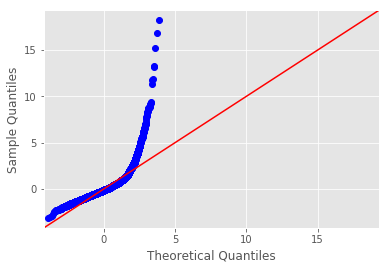

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_living15
-------------------------------------------------------------------------------------


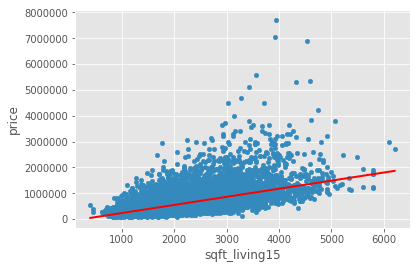

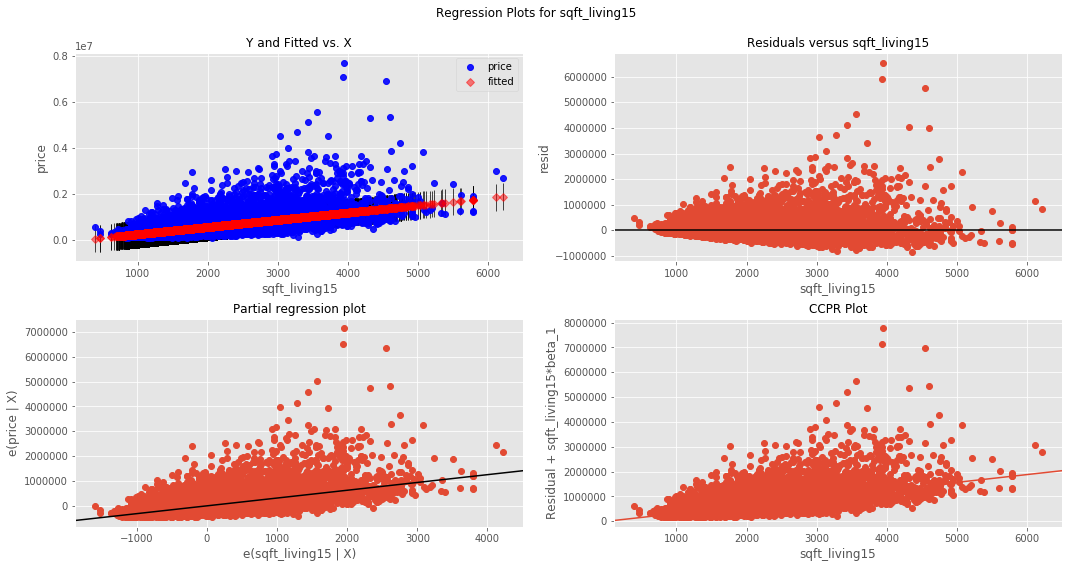

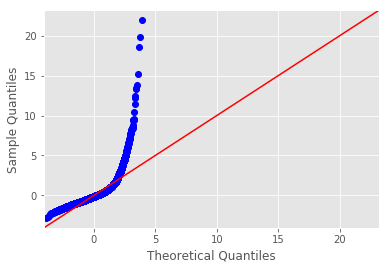

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_lot15
-------------------------------------------------------------------------------------


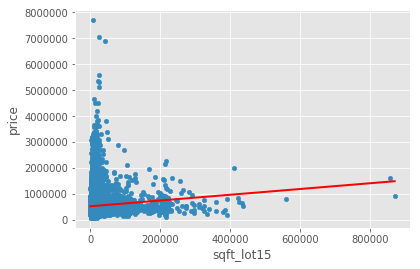

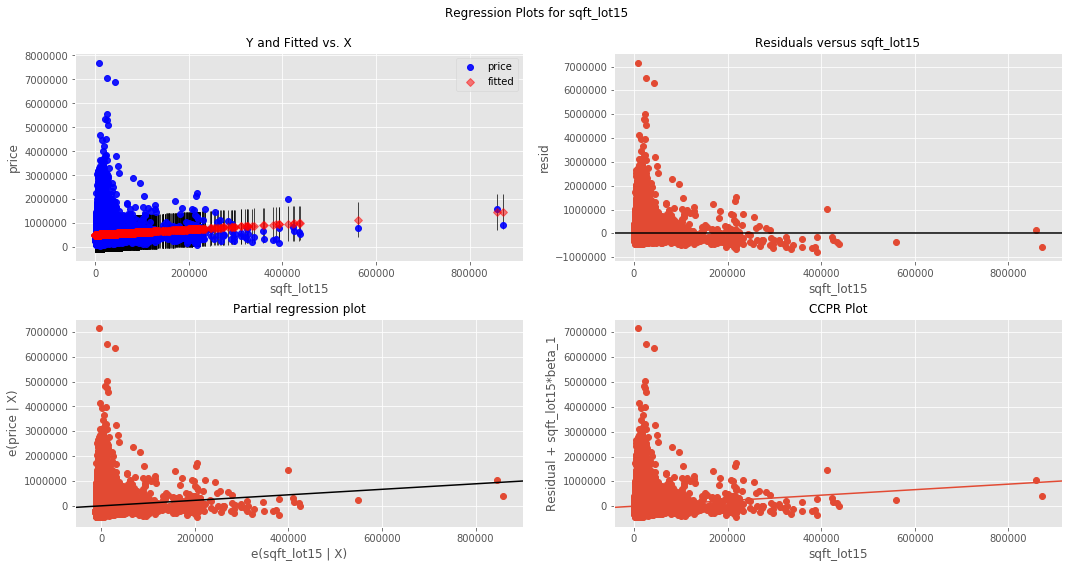

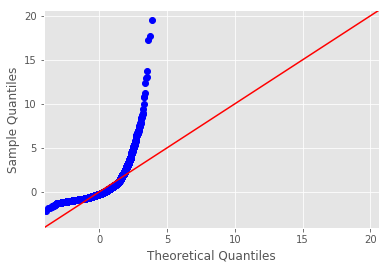

Press Enter to continue...


In [56]:
# We have a lot of variables in this dataset so lets pick a few chosen continuous independent variables
# By plotting the residuals and the qq plots we can see how the distribution compares to a normal distribution
# So we can see if transformations are needed 

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                           'sqft_above', 'sqft_living15', 'sqft_lot15']):
    print ("King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
#   
    model = smf.ols(formula=f, data=kc).fit()
    
    X_new = pd.DataFrame({val: [kc[val].min(), kc[val].max()]});
    preds = model.predict(X_new)
    kc.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")


In [57]:
pd.DataFrame(results)
# sqft_living and grade have the highest r_squared values but they still aren't good. Definitely needs preprocessing

0           1          2         3            4               5
0        ind_var   r_squared  intercept     slope      p-value  normality (JB)
1       bedrooms    0.100312     105504    129050            0     1.16192e+06
2      bathrooms    0.276927    7153.99    251874            0          876368
3    sqft_living    0.492645   -44772.2   281.067            0          538438
4       sqft_lot   0.0079413     528791  0.789481  5.06427e-39     1.14013e+06
5     sqft_above     0.36641      59331    268.76            0          724366
6  sqft_living15    0.341727   -83130.6    313.75            0     1.89365e+06
7     sqft_lot15  0.00679662     526563   1.10924   1.2616e-33     1.13498e+06

Some observations:

- Number of bedrooms has a positive relationship with price. Has a low r-squared so not a good fit. Skewed but normal distribution, qqplot has long tail which hurts normality. 

- Number of bathrooms has a positive relationship with price. Data looks categorical. Residual plots show heteroscadasticity - cone shaped residuals. Not normally distributed, qq plot has long tail

- sqft_living has a positive relationship with price. Has a high r squared value so this model fits this variable better. Residual plots show heteroscadascity, qqplot has long tail

- sqft_lot has a positive relationship with price. Very low r squared value, model does not fit. Heteroscadastic distribution of residuals. QQ plot has long tail

- sqft_above has a positive relationship with price. Has one of the higher r squared values so the model fits this variable better. QQ plot has long tail

- sqft_living15 has a positive relationship with price. has one of the higher r squared values so the model fits this variable better. QQ plot has long tail

- sqft_lot15 has a positive relationship with price. Has a low r squared value so the model does not fit well. QQplot has long tail

#Since all the continuous variables have long tails in their qqplots, it may be a good idea to perform a log transformation on all of these variables

## Let's Create Dummies for our Categorical Data

In [58]:
# kc.info()
# Now let's change categorical data to dtype 'category'
# and then create dummy variables for each categorical variable
kc['waterfront'] = kc['waterfront'].astype('category')
kc['condition'] = kc['condition'].astype('category')
kc['floors'] = kc['floors'].astype('category')
kc['grade'] = kc['grade'].astype('category')
kc['view'] = kc['view'].astype('category')
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Data columns (total 21 columns):
id               21419 non-null int64
date             21419 non-null object
price            21419 non-null float64
bedrooms         21419 non-null int64
bathrooms        21419 non-null float64
sqft_living      21419 non-null int64
sqft_lot         21419 non-null int64
floors           21419 non-null category
waterfront       21419 non-null category
view             21419 non-null category
condition        21419 non-null category
grade            21419 non-null category
sqft_above       21419 non-null int64
sqft_basement    21419 non-null float64
yr_built         21419 non-null category
yr_renovated     21419 non-null category
zipcode          21419 non-null int64
lat              21419 non-null float64
long             21419 non-null float64
sqft_living15    21419 non-null int64
sqft_lot15       21419 non-null int64
dtypes: category(7), float64(5), int64(8), object(1)
memory u

In [59]:
# Create dummy variables for waterfront, specify drop_first as True so we don't introduce multicollinearity into data
waterfront_dummy = pd.get_dummies(kc.waterfront, prefix="waterfront", drop_first = True)
kc = kc.drop(["waterfront"], axis=1)  # drop original waterfront column
kc = pd.concat([kc, waterfront_dummy], axis=1) # add dummies to dataframe
kc.head() #preview

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot floors view condition  ... sqft_above  sqft_basement  \
0      5650    1.0  0.0         3  ...       1180            0.0   
1      7242    2.0  0.0         3  ...       2170          400.0   
2     10000    1.0  0.0         3  ...        770            0.0   
3      5000    1.0  0.0         5  ...       1050          910.0   
4      8080    1.0  0.0         3  ...       1680            0.0   

       yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
0  (1950, 1960]    (-1, 1940]   98178  47.5112 -122.257           1340   
1  (1950, 1960]  (1990, 2000]   98125  47.7210 -122.319           1690   
2  (1930, 1940]    (-1, 1940]   98028  47.7379 -122.233           2720   
3  (1960, 1970]    (-1, 1940]   98136  47.5208 -122.393           1360   
4  (1980, 1990]    (-1, 1940]   98074  47.6168 -122.045           1800   

   sqft_lot15  waterfront_1.0  
0        5650               0  
1        7639               0  
2        8062               0  
3        5000               0  
4        7503               0  

[5 rows x 21 columns]

In [60]:
# Do the same as we did for waterfront to floors
floors_dummy = pd.get_dummies(kc.floors, prefix="floors", drop_first = True)
kc = kc.drop(["floors"], axis=1)
kc = pd.concat([kc, floors_dummy], axis=1)
kc.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot view condition grade  ...      lat     long sqft_living15  \
0      5650  0.0         3     7  ...  47.5112 -122.257          1340   
1      7242  0.0         3     7  ...  47.7210 -122.319          1690   
2     10000  0.0         3     6  ...  47.7379 -122.233          2720   
3      5000  0.0         5     7  ...  47.5208 -122.393          1360   
4      8080  0.0         3     8  ...  47.6168 -122.045          1800   

  sqft_lot15  waterfront_1.0  floors_1.5  floors_2.0  floors_2.5  floors_3.0  \
0       5650               0           0           0           0           0   
1       7639               0           0           1           0           0   
2       8062               0           0           0           0           0   
3       5000               0           0           0           0           0   
4       7503               0           0           0           0           0   

   floors_3.5  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 25 columns]

In [61]:
view_dummy = pd.get_dummies(kc.view, prefix="view", drop_first = True)
kc = kc.drop(["view"], axis=1)
kc = pd.concat([kc, view_dummy], axis=1)
kc.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot condition grade  sqft_above  ...  waterfront_1.0 floors_1.5  \
0      5650         3     7        1180  ...               0          0   
1      7242         3     7        2170  ...               0          0   
2     10000         3     6         770  ...               0          0   
3      5000         5     7        1050  ...               0          0   
4      8080         3     8        1680  ...               0          0   

  floors_2.0  floors_2.5  floors_3.0  floors_3.5  view_1.0  view_2.0  \
0          0           0           0           0         0         0   
1          1           0           0           0         0         0   
2          0           0           0           0         0         0   
3          0           0           0           0         0         0   
4          0           0           0           0         0         0   

   view_3.0  view_4.0  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 28 columns]

In [62]:
condition_dummy = pd.get_dummies(kc.condition, prefix="condition", drop_first = True)
kc = kc.drop(["condition"], axis=1)
kc = pd.concat([kc, condition_dummy], axis=1)
kc.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot grade  sqft_above  sqft_basement  ... floors_3.0 floors_3.5  \
0      5650     7        1180            0.0  ...          0          0   
1      7242     7        2170          400.0  ...          0          0   
2     10000     6         770            0.0  ...          0          0   
3      5000     7        1050          910.0  ...          0          0   
4      8080     8        1680            0.0  ...          0          0   

   view_1.0  view_2.0  view_3.0  view_4.0  condition_2  condition_3  \
0         0         0         0         0            0            1   
1         0         0         0         0            0            1   
2         0         0         0         0            0            1   
3         0         0         0         0            0            0   
4         0         0         0         0            0            1   

   condition_4  condition_5  
0            0            0  
1            0            0  
2            0            0  
3            0            1  
4            0            0  

[5 rows x 31 columns]

In [63]:
grade_dummy = pd.get_dummies(kc.grade, prefix="grade", drop_first = True)
kc = kc.drop(["grade"], axis=1)
kc = pd.concat([kc, grade_dummy], axis=1)
kc.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  sqft_above  sqft_basement      yr_built  ... grade_4  grade_5  \
0      5650        1180            0.0  (1950, 1960]  ...       0        0   
1      7242        2170          400.0  (1950, 1960]  ...       0        0   
2     10000         770            0.0  (1930, 1940]  ...       0        0   
3      5000        1050          910.0  (1960, 1970]  ...       0        0   
4      8080        1680            0.0  (1980, 1990]  ...       0        0   

   grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  
0        0        1        0        0         0         0         0         0  
1        0        1        0        0         0         0         0         0  
2        1        0        0        0         0         0         0         0  
3        0        1        0        0         0         0         0         0  
4        0        0        1        0         0         0         0         0  

[5 rows x 40 columns]

In [64]:
yr_built_dummy = pd.get_dummies(kc.yr_built, prefix="yr_built", drop_first = True)
kc = kc.drop(["yr_built"], axis=1)
kc = pd.concat([kc, yr_built_dummy], axis=1)
kc.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  sqft_above  sqft_basement  yr_renovated  ...  \
0      5650        1180            0.0    (-1, 1940]  ...   
1      7242        2170          400.0  (1990, 2000]  ...   
2     10000         770            0.0    (-1, 1940]  ...   
3      5000        1050          910.0    (-1, 1940]  ...   
4      8080        1680            0.0    (-1, 1940]  ...   

   yr_built_(1920, 1930]  yr_built_(1930, 1940]  yr_built_(1940, 1950]  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      1                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   yr_built_(1950, 1960]  yr_built_(1960, 1970]  yr_built_(1970, 1980]  \
0                      1                      0                      0   
1                      1                      0                      0   
2                      0                      0                      0   
3                      0                      1                      0   
4                      0                      0                      0   

   yr_built_(1980, 1990]  yr_built_(1990, 2000]  yr_built_(2000, 2010]  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      1                      0                      0   

   yr_built_(2010, 2020]  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 51 columns]

In [65]:
yr_renovated_dummy = pd.get_dummies(kc.yr_renovated, prefix="yr_renovated", drop_first = True)
kc = kc.drop(["yr_renovated"], axis=1)
kc = pd.concat([kc, yr_renovated_dummy], axis=1)
kc.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  sqft_above  sqft_basement  zipcode  ...  yr_built_(2000, 2010]  \
0      5650        1180            0.0    98178  ...                      0   
1      7242        2170          400.0    98125  ...                      0   
2     10000         770            0.0    98028  ...                      0   
3      5000        1050          910.0    98136  ...                      0   
4      8080        1680            0.0    98074  ...                      0   

   yr_built_(2010, 2020]  yr_renovated_(1940, 1950]  \
0                      0                          0   
1                      0                          0   
2                      0                          0   
3                      0                          0   
4                      0                          0   

   yr_renovated_(1950, 1960]  yr_renovated_(1960, 1970]  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   yr_renovated_(1970, 1980]  yr_renovated_(1980, 1990]  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   yr_renovated_(1990, 2000]  yr_renovated_(2000, 2010]  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   yr_renovated_(2010, 2020]  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 58 columns]

In [66]:
# preview all of our column titles, we can see that all categories with dummies dropped the first column
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_1.0', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'view_1.0',
       'view_2.0', 'view_3.0', 'view_4.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'yr_built_(1900, 1910]', 'yr_built_(1910, 1920]',
       'yr_built_(1920, 1930]', 'yr_built_(1930, 1940]',
       'yr_built_(1940, 1950]', 'yr_built_(1950, 1960]',
       'yr_built_(1960, 1970]', 'yr_built_(1970, 1980]',
       'yr_built_(1980, 1990]', 'yr_built_(1990, 2000]',
       'yr_built_(2000, 2010]', 'yr_built_(2010, 2020]',
       'yr_renovated_(1940, 1950]', 'yr_renovated_(1950, 1960]',
       'yr_renovated_(1960, 1970]', 'yr_renovated_(1970, 1980]',
      

In [67]:
# Let's drop zip code since that would create too many columns for this current analysis
kc = kc.drop(["zipcode"], axis=1)
# Let's drop date sold since it won't be very helpful to our question
kc = kc.drop(["date"], axis=1)
# Let's drop 'id' since it doesn't mean much in correlation with price
kc = kc.drop(["id"], axis=1)

In [68]:
kc.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
0  221900.0         3       1.00         1180      5650        1180   
1  538000.0         3       2.25         2570      7242        2170   
2  180000.0         2       1.00          770     10000         770   
3  604000.0         4       3.00         1960      5000        1050   
4  510000.0         3       2.00         1680      8080        1680   

   sqft_basement      lat     long  sqft_living15  ...  yr_built_(2000, 2010]  \
0            0.0  47.5112 -122.257           1340  ...                      0   
1          400.0  47.7210 -122.319           1690  ...                      0   
2            0.0  47.7379 -122.233           2720  ...                      0   
3          910.0  47.5208 -122.393           1360  ...                      0   
4            0.0  47.6168 -122.045           1800  ...                      0   

   yr_built_(2010, 2020]  yr_renovated_(1940, 1950]  \
0                      0                          0   
1                      0                          0   
2                      0                          0   
3                      0                          0   
4                      0                          0   

   yr_renovated_(1950, 1960]  yr_renovated_(1960, 1970]  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   yr_renovated_(1970, 1980]  yr_renovated_(1980, 1990]  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   yr_renovated_(1990, 2000]  yr_renovated_(2000, 2010]  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   yr_renovated_(2010, 2020]  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 55 columns]

## Check Correlation and Collinearity


In [69]:
# slice only the continuous data [rows,columns]
kc_cont = kc.iloc[:,0:11]
print(kc_cont.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


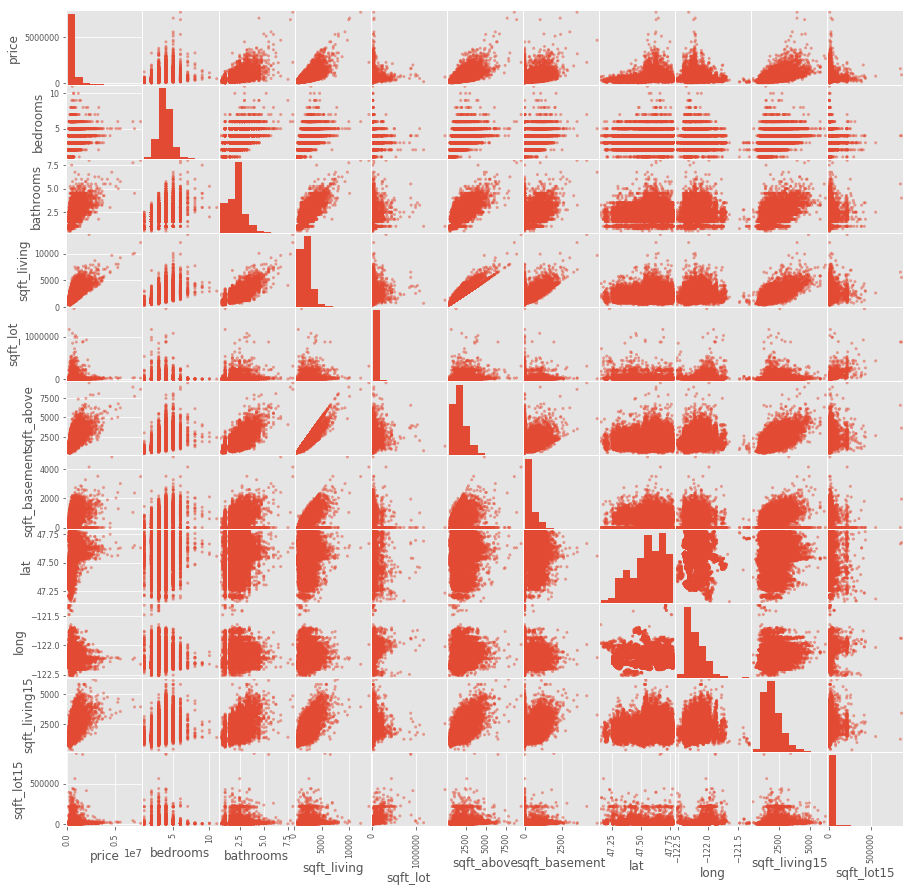

In [70]:
# create a scatter matrix to visualize distributions of all continuous data variables
# All variables show a positive relationship with price, lots of heteroskedacity
pd.plotting.scatter_matrix(kc_cont,figsize  = [15, 15]);

In [71]:
# check correlation of continuous variables
kc_cont.corr() 

price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price          1.000000  0.316721   0.526239     0.701887  0.089114   
bedrooms       0.316721  1.000000   0.528912     0.594217  0.033634   
bathrooms      0.526239  0.528912   1.000000     0.755519  0.087775   
sqft_living    0.701887  0.594217   0.755519     1.000000  0.172582   
sqft_lot       0.089114  0.033634   0.087775     0.172582  1.000000   
sqft_above     0.605318  0.493560   0.686325     0.876534  0.183204   
sqft_basement  0.320670  0.302976   0.278175     0.427458  0.015629   
lat            0.305739 -0.012957   0.023165     0.050762 -0.085815   
long           0.020994  0.137004   0.223795     0.240197  0.230261   
sqft_living15  0.584574  0.406232   0.569446     0.756184  0.143798   
sqft_lot15     0.082442  0.031782   0.087754     0.183832  0.717742   

               sqft_above  sqft_basement       lat      long  sqft_living15  \
price            0.605318       0.320670  0.305739  0.020994       0.584574   
bedrooms         0.493560       0.302976 -0.012957  0.137004       0.406232   
bathrooms        0.686325       0.278175  0.023165  0.223795       0.569446   
sqft_living      0.876534       0.427458  0.050762  0.240197       0.756184   
sqft_lot         0.183204       0.015629 -0.085815  0.230261       0.143798   
sqft_above       1.000000      -0.051891 -0.002001  0.344138       0.731877   
sqft_basement   -0.051891       1.000000  0.108267 -0.143566       0.197381   
lat             -0.002001       0.108267  1.000000 -0.136197       0.047528   
long             0.344138      -0.143566 -0.136197  1.000000       0.334655   
sqft_living15    0.731877       0.197381  0.047528  0.334655       1.000000   
sqft_lot15       0.194436       0.015728 -0.086213  0.255413       0.182756   

               sqft_lot15  
price            0.082442  
bedrooms         0.031782  
bathrooms        0.087754  
sqft_living      0.183832  
sqft_lot         0.717742  
sqft_above       0.194436  
sqft_basement    0.015728  
lat             -0.086213  
long             0.255413  
sqft_living15    0.182756  
sqft_lot15       1.000000

# Observations

- There is a high correlation between sqft_living and price and sqft_above and price
- Bathrooms, Sqft_basement and Latitude both are also positively correlated with price
- Latitude seems to have a higher correlation with price than longitude which matches our previous visualizations
- longitude, sqft_lot, sqft_lot15 have low correlation

In [72]:
abs(kc_cont.corr())>0.75

price  bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
price           True     False      False        False     False       False   
bedrooms       False      True      False        False     False       False   
bathrooms      False     False       True         True     False       False   
sqft_living    False     False       True         True     False        True   
sqft_lot       False     False      False        False      True       False   
sqft_above     False     False      False         True     False        True   
sqft_basement  False     False      False        False     False       False   
lat            False     False      False        False     False       False   
long           False     False      False        False     False       False   
sqft_living15  False     False      False         True     False       False   
sqft_lot15     False     False      False        False     False       False   

               sqft_basement    lat   long  sqft_living15  sqft_lot15  
price                  False  False  False          False       False  
bedrooms               False  False  False          False       False  
bathrooms              False  False  False          False       False  
sqft_living            False  False  False           True       False  
sqft_lot               False  False  False          False       False  
sqft_above             False  False  False          False       False  
sqft_basement           True  False  False          False       False  
lat                    False   True  False          False       False  
long                   False  False   True          False       False  
sqft_living15          False  False  False           True       False  
sqft_lot15             False  False  False          False        True

In [73]:
# sqft_living is most problematic since it is highly correlated the most variables so remove this from dataset
kc = kc.drop("sqft_living",axis=1)

Specify categorical and data and see which variables are correlated. <br>
- Categorical data: bedrooms, bathrooms, floors, waterfront, view, condition, yr_built, yr_renovated, grade
- Continuous data: sqft_lot, sqft_above, sqft_basement, lat, long, sqft_living15, sqft_lot15

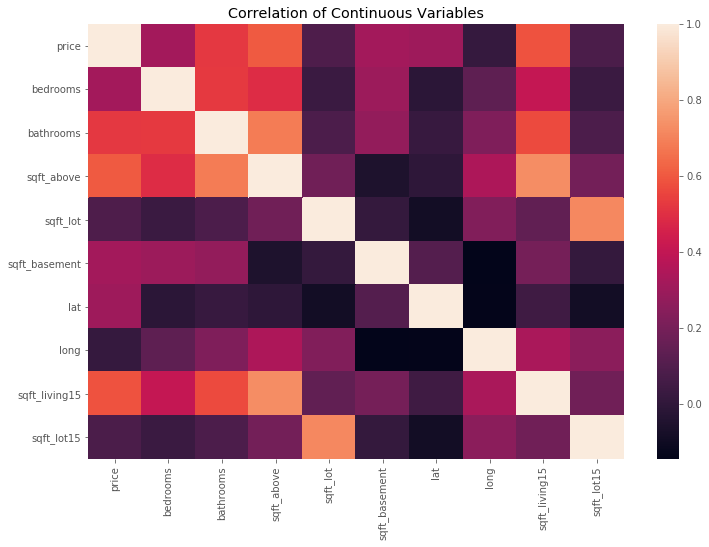

<Figure size 432x288 with 0 Axes>

In [74]:
#kc.head()
numcols = ['price','bedrooms','bathrooms','sqft_above','sqft_lot','sqft_basement', 
           'lat','long','sqft_living15','sqft_lot15']
catcols = [x for x in kc.columns if x not in numcols]

#Lets start by plotting a heatmap to determine if any variables are correlated
#Did only continuous data b/c there are too many categorical variables to put in a heat map
plt.figure(figsize = (12,8))
sns.heatmap(data=kc[numcols].corr())
plt.title('Correlation of Continuous Variables')
plt.show();
plt.gcf().clear()

Observations:
- price highly correlated with sqft_above, sqft_living15, bathrooms and to a lesser extent bedrooms, lat, sqft_basement
- bathrooms highly correlated with sqft_above

## Transformations, Normalizations, Standardizations


In [75]:
from statsmodels.formula.api import ols
# Create a multiple linear regression model with just the continuous data as the predictors

outcome = 'price'
x_cols = ['bedrooms', 'bathrooms','sqft_above', 'sqft_lot', 'sqft_basement',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=kc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     3574.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:10:19   Log-Likelihood:            -2.9507e+05
No. Observations:               21419   AIC:                         5.902e+05
Df Residuals:                   21409   BIC:                         5.902e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -7.93e+07    1.6e+06    -49.698      0.000   -8.24e+07   -7.62e+07
bedrooms       -5.26e+04   2233.512    -23.550      0.000    -5.7e+04   -4.82e+04
bathrooms      2.076e+04   3210.270      6.466      0.000    1.45e+04     2.7e+04
sqft_above      261.0287      3.804     68.611      0.000     253.572     268.486
sqft_lot          0.2596      0.055      4.694      0.000       0.151       0.368
sqft_basement   248.9744      4.556     54.648      0.000     240.044     257.904
lat             6.47e+05   1.17e+04     55.231      0.000    6.24e+05     6.7e+05
long          -3.967e+05   1.28e+04    -31.046      0.000   -4.22e+05   -3.72e+05
sqft_living15    87.6291      3.715     23.589      0.000      80.348      94.910
sqft_lot15       -0.3679      0.085     -4.342      0.000      -0.534      -0.202
==============================================================================
Omnibus:                    17207.345   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1077695.262
Skew:                           3.408   Prob(JB):                         0.00
Kurtosis:                      37.075   Cond. No.                     5.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

.6 is not a bad R squared value, but the R squared and adj R squared are the same, suggesting high multicollinearity

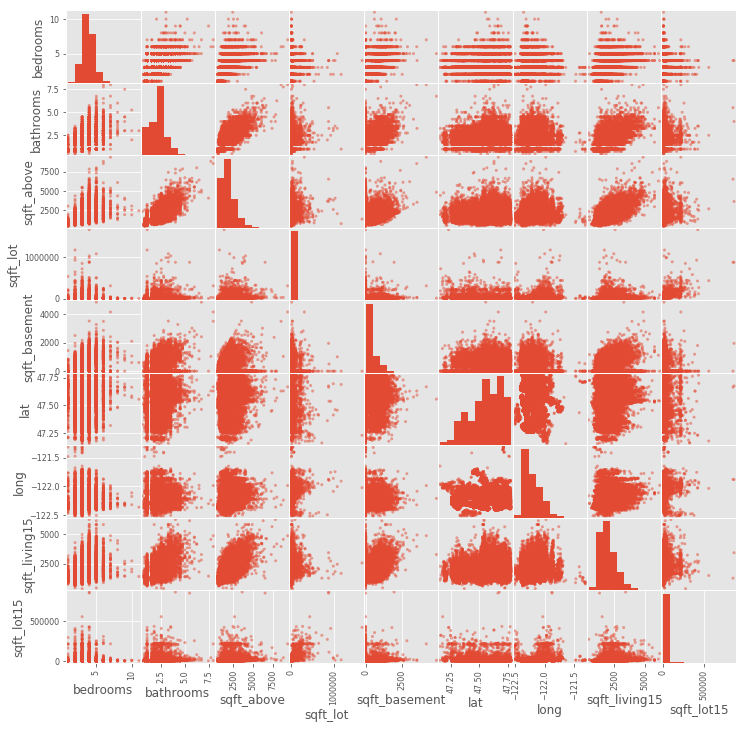

In [76]:
# Let's visualize our distributions again, note that they are mostly skewed with long tails to the right
pd.plotting.scatter_matrix(kc[x_cols], figsize=(12,12));

Now let's log transform our continuous data to normalize the distribution of our variables. <br>

Continuous data: bedrooms, bathrooms, price, sqft_lot, sqft_above, lat, long, sqft_living15, sqft_lot15
<br>
We removed sqft_living since it is highly correlated with two other variables

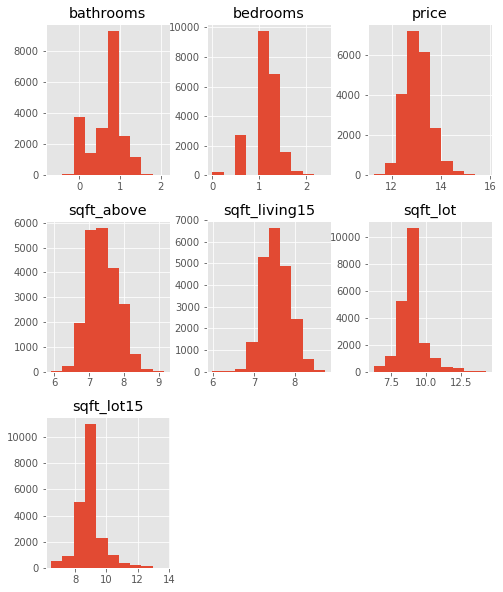

In [77]:
# Let's look at log transformation on continuous variables

data_log= pd.DataFrame([])
data_log["bedrooms"] = np.log(kc["bedrooms"])
data_log["bathrooms"] = np.log(kc["bathrooms"])
data_log["price"] = np.log(kc["price"])
data_log["sqft_above"] = np.log(kc["sqft_above"])
data_log["sqft_lot"] = np.log(kc["sqft_lot"])
data_log["sqft_living15"] = np.log(kc["sqft_living15"])
data_log["sqft_lot15"] = np.log(kc["sqft_lot15"])
# data_log["lat"] = np.log(kc['lat'])    # Attempted to log transform lat and long since they are continuous but 
# data_log["long"] = np.log(kc['long'])  # Can't transform long since it is negative and will result in NaNs
                                         # Thus did not transform lat and long variables

data_log.hist(figsize  = [8, 10]);

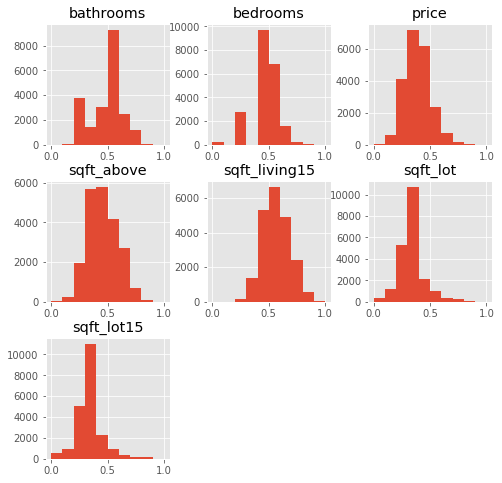

In [78]:
#log transform all continuous variables we are keeping
logbedrooms = data_log["bedrooms"]
logbathrooms = data_log["bathrooms"]
logprice = data_log["price"]
logsqft_above = data_log["sqft_above"]
logsqft_lot = data_log["sqft_lot"]
logsqft_living15 = data_log["sqft_living15"]
logsqft_lot15 = data_log["sqft_lot15"]
#loglat = data_log["lat"]
#loglong = data_log["long"]


kc_features_final= pd.DataFrame([])

# Use min max scaling on all continuous variables

kc_features_final["bedrooms"] = (logbedrooms-min(logbedrooms))/(max(logbedrooms)-min(logbedrooms))
kc_features_final["bathrooms"] = (logbathrooms-min(logbathrooms))/(max(logbathrooms)-min(logbathrooms))
kc_features_final["price"] = (logprice-min(logprice))/(max(logprice)-min(logprice))
kc_features_final["sqft_above"] = (logsqft_above-min(logsqft_above))/(max(logsqft_above)-min(logsqft_above))
kc_features_final["sqft_lot"] = (logsqft_lot-min(logsqft_lot))/(max(logsqft_lot)-min(logsqft_lot))
kc_features_final["sqft_living15"] = (logsqft_living15-min(logsqft_living15))/(max(logsqft_living15)-min(logsqft_living15))
kc_features_final["sqft_lot15"] = (logsqft_lot15-min(logsqft_lot15))/(max(logsqft_lot15)-min(logsqft_lot15))
#kc_features_final["lat"] = (loglat-min(loglat))/(max(loglat)-min(loglat))
#kc_features_final["long"] = (loglong-min(loglong))/(max(loglong)-min(loglong))

kc_features_final.hist(figsize  = [8, 8]);


In [79]:
kc_features_final.head()

bedrooms  bathrooms     price  sqft_above  sqft_lot  sqft_living15  \
0  0.458157   0.250000  0.227669    0.358392  0.295858       0.441342   
1  0.458157   0.542481  0.420522    0.546652  0.326644       0.525882   
2  0.289065   0.250000  0.182099    0.226478  0.366664       0.699256   
3  0.578130   0.646241  0.445720    0.322322  0.280700       0.446739   
4  0.458157   0.500000  0.408883    0.467563  0.340224       0.548854   

   sqft_lot15  
0    0.300162  
1    0.342058  
2    0.349544  
3    0.283185  
4    0.339562

In [80]:
kc_features_final.corr() 
# price is highly correlated with bathrooms, sqft_above, sqft_living15, but those variables are all highly correlated
# with each other. 

bedrooms  bathrooms     price  sqft_above  sqft_lot  \
bedrooms       1.000000   0.535814  0.343902    0.548857  0.197346   
bathrooms      0.535814   1.000000  0.520465    0.683509  0.084874   
price          0.343902   0.520465  1.000000    0.586223  0.138580   
sqft_above     0.548857   0.683509  0.586223    1.000000  0.319225   
sqft_lot       0.197346   0.084874  0.138580    0.319225  1.000000   
sqft_living15  0.428652   0.569827  0.606890    0.713572  0.364211   
sqft_lot15     0.176874   0.079128  0.124129    0.299384  0.918610   

               sqft_living15  sqft_lot15  
bedrooms            0.428652    0.176874  
bathrooms           0.569827    0.079128  
price               0.606890    0.124129  
sqft_above          0.713572    0.299384  
sqft_lot            0.364211    0.918610  
sqft_living15       1.000000    0.374051  
sqft_lot15          0.374051    1.000000

Now let's add our dummies to the new dataframe.<br>
- Categorical data: floors, waterfront, view, condition, yr_built, yr_renovated, grade, zipcode
- Decided to remove zip code and just use latitude and longitude as location variables

In [81]:
lat = kc["lat"] # add lat and long since they were not transformed
long = kc["long"]
kc_features_final = pd.concat([kc_features_final, lat, long, waterfront_dummy, condition_dummy, grade_dummy,
                              view_dummy, floors_dummy, yr_built_dummy, yr_renovated_dummy], axis=1)

In [82]:
kc_features_final.head() # preview of our cleaned up final data

bedrooms  bathrooms     price  sqft_above  sqft_lot  sqft_living15  \
0  0.458157   0.250000  0.227669    0.358392  0.295858       0.441342   
1  0.458157   0.542481  0.420522    0.546652  0.326644       0.525882   
2  0.289065   0.250000  0.182099    0.226478  0.366664       0.699256   
3  0.578130   0.646241  0.445720    0.322322  0.280700       0.446739   
4  0.458157   0.500000  0.408883    0.467563  0.340224       0.548854   

   sqft_lot15      lat     long  waterfront_1.0  ...  yr_built_(2000, 2010]  \
0    0.300162  47.5112 -122.257               0  ...                      0   
1    0.342058  47.7210 -122.319               0  ...                      0   
2    0.349544  47.7379 -122.233               0  ...                      0   
3    0.283185  47.5208 -122.393               0  ...                      0   
4    0.339562  47.6168 -122.045               0  ...                      0   

   yr_built_(2010, 2020]  yr_renovated_(1940, 1950]  \
0                      0                          0   
1                      0                          0   
2                      0                          0   
3                      0                          0   
4                      0                          0   

   yr_renovated_(1950, 1960]  yr_renovated_(1960, 1970]  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   yr_renovated_(1970, 1980]  yr_renovated_(1980, 1990]  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   yr_renovated_(1990, 2000]  yr_renovated_(2000, 2010]  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   yr_renovated_(2010, 2020]  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 53 columns]

## Multiple Linear Regression Time!!

In [83]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [84]:
kc_features_final.columns # check what variables we have left

Index(['bedrooms', 'bathrooms', 'price', 'sqft_above', 'sqft_lot',
       'sqft_living15', 'sqft_lot15', 'lat', 'long', 'waterfront_1.0',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'view_1.0', 'view_2.0', 'view_3.0',
       'view_4.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'floors_3.5', 'yr_built_(1900, 1910]', 'yr_built_(1910, 1920]',
       'yr_built_(1920, 1930]', 'yr_built_(1930, 1940]',
       'yr_built_(1940, 1950]', 'yr_built_(1950, 1960]',
       'yr_built_(1960, 1970]', 'yr_built_(1970, 1980]',
       'yr_built_(1980, 1990]', 'yr_built_(1990, 2000]',
       'yr_built_(2000, 2010]', 'yr_built_(2010, 2020]',
       'yr_renovated_(1940, 1950]', 'yr_renovated_(1950, 1960]',
       'yr_renovated_(1960, 1970]', 'yr_renovated_(1970, 1980]',
       'yr_renovated_(1980, 1990]', 'yr_renovated_(1990, 2000]',
     

In [85]:
kc_features_final = kc_features_final.drop(columns=['price']) # drop 'price' from features since this is the target

In [86]:
# assign our independent variables to X and our dependent variable to y
X = kc_features_final
#y = pd.Series(kc.price)#, columns= ["price"])
y = pd.DataFrame(kc.price, columns = ["price"])

In [87]:
X.head()
type(y)
y.head()

price
0  221900.0
1  538000.0
2  180000.0
3  604000.0
4  510000.0

In [88]:
# Run a Multiple Linear Regression Model with ALL independent variables 
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

C:\Users\isali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1021.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:13:05   Log-Likelihood:            -2.9152e+05
No. Observations:               21419   AIC:                         5.831e+05
Df Residuals:                   21366   BIC:                         5.836e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.878e+07   1.62e+06    -23.937      0.000    -4.2e+07   -3.56e+07
bedrooms                   1.246e+04   1.55e+04      0.802      0.422    -1.8e+04    4.29e+04
bathrooms                  3.332e+05   1.65e+04     20.201      0.000    3.01e+05    3.66e+05
sqft_above                 4.666e+05   2.29e+04     20.408      0.000    4.22e+05    5.11e+05
sqft_lot                   1.071e+05    3.2e+04      3.344      0.001    4.43e+04     1.7e+05
sqft_living15              3.244e+05   1.89e+04     17.128      0.000    2.87e+05    3.62e+05
sqft_lot15                -1.664e+05    3.1e+04     -5.371      0.000   -2.27e+05   -1.06e+05
lat                        5.852e+05   1.06e+04     55.297      0.000    5.64e+05    6.06e+05
long                      -9.037e+04   1.24e+04     -7.312      0.000   -1.15e+05   -6.61e+04
waterfront_1.0             5.784e+05   2.01e+04     28.731      0.000    5.39e+05    6.18e+05
condition_2                8.266e+04   4.06e+04      2.038      0.042    3151.366    1.62e+05
condition_3                8.852e+04   3.77e+04      2.348      0.019    1.46e+04    1.62e+05
condition_4                1.395e+05   3.77e+04      3.698      0.000    6.56e+04    2.13e+05
condition_5                1.801e+05   3.79e+04      4.746      0.000    1.06e+05    2.54e+05
grade_4                   -1.825e+05   2.01e+05     -0.907      0.364   -5.77e+05    2.12e+05
grade_5                   -2.345e+05   1.98e+05     -1.184      0.236   -6.23e+05    1.54e+05
grade_6                   -2.131e+05   1.98e+05     -1.078      0.281   -6.01e+05    1.74e+05
grade_7                   -1.669e+05   1.98e+05     -0.844      0.399   -5.54e+05    2.21e+05
grade_8                   -9.726e+04   1.98e+05     -0.492      0.623   -4.85e+05     2.9e+05
grade_9                    4.994e+04   1.98e+05      0.252      0.801   -3.38e+05    4.38e+05
grade_10                   2.725e+05   1.98e+05      1.376      0.169   -1.16e+05    6.61e+05
grade_11                   6.023e+05   1.98e+05      3.039      0.002    2.14e+05    9.91e+05
grade_12                   1.194e+06   1.99e+05      5.994      0.000    8.03e+05    1.58e+06
grade_13                   2.572e+06   2.06e+05     12.505      0.000    2.17e+06    2.97e+06
view_1.0                    1.35e+05   1.11e+04     12.114      0.000    1.13e+05    1.57e+05
view_2.0                   8.411e+04   6739.155     12.480      0.000    7.09e+04    9.73e+04
view_3.0                   1.605e+05   9205.221     17.431      0.000    1.42e+05    1.79e+05
view_4.0                   2.883e+05    1.4e+04     20.561      0.000    2.61e+05    3.16e+05
floors_1.5                -3.117e+04   5783.220     -5.390      0.000   -4.25e+04   -1.98e+04
floors_2.0                -3.554e+04   4898.768     -7.255      0.000   -4.

- R-Squared is .713 which is quite high. Adj R-squared is similar so there may be some multicollinearity?
- Prob (F-Statistic) is 0.00 which is significant
- majority of variables have a significant effect on price, yr_built is a better predictor than yr_renovated

## Stepwise Selection
<br>
Define a function called stepwise_selection recieved from the curriculum. This allows us to eliminate independent variables which are insignificant.

In [89]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
         # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [90]:
# Define our predictor and target variables
result = stepwise_selection(X=X, y=y, verbose = True)
print('resulting features:')
print(result)

Add  grade_11                       with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  lat                            with p-value 0.0
Add  waterfront_1.0                 with p-value 0.0
Add  grade_12                       with p-value 0.0
Add  grade_10                       with p-value 0.0
Add  grade_13                       with p-value 0.0
Add  grade_9                        with p-value 8.74759e-276
Add  condition_3                    with p-value 1.99362e-162
Add  sqft_living15                  with p-value 4.86558e-139
Add  long                           with p-value 9.20185e-194
Add  bathrooms                      with p-value 1.90038e-89
Add  yr_renovated_(2000, 2010]      with p-value 1.87792e-80
Add  view_4.0                       with p-value 1.02027e-72
Add  view_3.0                       with p-value 1.67909e-71
Add  view_2.0                       with p-value 1.19547e-51
Add  yr_built_(1900, 1910]          with p-value 1.67744e-45
Add  yr_built_(

C:\Users\isali\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  sqft_lot15                     with p-value 1.11109e-05
Add  floors_1.5                     with p-value 1.08673e-05
Add  yr_built_(1940, 1950]          with p-value 5.72099e-06
Add  floors_3.0                     with p-value 0.000192901
Add  sqft_lot                       with p-value 0.0013156
Add  yr_renovated_(1960, 1970]      with p-value 0.00282599
resulting features:
['grade_11', 'sqft_above', 'lat', 'waterfront_1.0', 'grade_12', 'grade_10', 'grade_13', 'grade_9', 'sqft_living15', 'long', 'bathrooms', 'yr_renovated_(2000, 2010]', 'view_4.0', 'view_3.0', 'view_2.0', 'yr_built_(1900, 1910]', 'yr_built_(1920, 1930]', 'grade_8', 'yr_built_(1910, 1920]', 'view_1.0', 'floors_2.0', 'yr_built_(1980, 1990]', 'yr_built_(1990, 2000]', 'yr_built_(1970, 1980]', 'yr_built_(2000, 2010]', 'condition_5', 'yr_built_(1960, 1970]', 'grade_7', 'yr_built_(2010, 2020]', 'yr_built_(1950, 1960]', 'floors_2.5', 'yr_renovated_(1990, 2000]', 'yr_renovated_(2010, 2020]', 'condition_4', 'sqft_lot15', '

In [91]:
import statsmodels.api as sm
X_fin = X[['bathrooms', 'view_4.0', 'lat', 'grade_10', 'sqft_above', 'grade_12', 'grade_11', 'grade_13', 'grade_9', 
           'waterfront_1.0', 'long', 'sqft_living15', 'yr_renovated_(2000, 2010]', 'view_3.0', 'view_2.0', 
           'yr_built_(1900, 1910]', 'yr_built_(1920, 1930]', 'grade_8', 'yr_built_(1910, 1920]', 'view_1.0', 
           'floors_2.0', 'yr_built_(1980, 1990]', 'yr_built_(1990, 2000]', 'yr_built_(1970, 1980]', 
           'yr_built_(2000, 2010]', 'condition_5', 'yr_built_(1960, 1970]', 'grade_7', 'yr_built_(2010, 2020]', 
           'yr_built_(1950, 1960]', 'floors_2.5', 'yr_renovated_(1990, 2000]', 'yr_renovated_(2010, 2020]', 
           'condition_4', 'sqft_lot15', 'floors_1.5', 'yr_built_(1940, 1950]', 'floors_3.0', 'sqft_lot', 
           'yr_renovated_(1960, 1970]']]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1327.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:18:08   Log-Likelihood:            -2.9153e+05
No. Observations:               21419   AIC:                         5.831e+05
Df Residuals:                   21378   BIC:                         5.835e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.901e+07    1.6e+06    -24.321      0.000   -4.22e+07   -3.59e+07
bathrooms                  3.383e+05   1.55e+04     21.791      0.000    3.08e+05    3.69e+05
view_4.0                   2.871e+05    1.4e+04     20.493      0.000     2.6e+05    3.15e+05
lat                         5.85e+05   1.06e+04     55.407      0.000    5.64e+05    6.06e+05
grade_10                   4.876e+05      1e+04     48.749      0.000    4.68e+05    5.07e+05
sqft_above                  4.74e+05   2.18e+04     21.757      0.000    4.31e+05    5.17e+05
grade_12                    1.41e+06   2.35e+04     60.008      0.000    1.36e+06    1.46e+06
grade_11                   8.173e+05   1.36e+04     60.252      0.000    7.91e+05    8.44e+05
grade_13                   2.785e+06   5.61e+04     49.621      0.000    2.68e+06     2.9e+06
grade_9                    2.651e+05   8164.533     32.476      0.000    2.49e+05    2.81e+05
waterfront_1.0             5.764e+05   2.01e+04     28.682      0.000    5.37e+05    6.16e+05
long                      -9.103e+04   1.23e+04     -7.392      0.000   -1.15e+05   -6.69e+04
sqft_living15              3.238e+05   1.89e+04     17.138      0.000    2.87e+05    3.61e+05
yr_renovated_(2000, 2010]   1.99e+05   1.39e+04     14.325      0.000    1.72e+05    2.26e+05
view_3.0                   1.603e+05   9199.464     17.428      0.000    1.42e+05    1.78e+05
view_2.0                   8.428e+04   6735.277     12.513      0.000    7.11e+04    9.75e+04
yr_built_(1900, 1910]      4.569e+04   1.08e+04      4.222      0.000    2.45e+04    6.69e+04
yr_built_(1920, 1930]      2.448e+04   9636.029      2.540      0.011    5588.701    4.34e+04
grade_8                    1.179e+05   6571.082     17.948      0.000    1.05e+05    1.31e+05
yr_built_(1910, 1920]      2.667e+04   1.05e+04      2.541      0.011    6096.309    4.72e+04
view_1.0                   1.345e+05   1.11e+04     12.077      0.000    1.13e+05    1.56e+05
floors_2.0                -3.611e+04   4871.682     -7.413      0.000   -4.57e+04   -2.66e+04
yr_built_(1980, 1990]     -1.709e+05   9463.055    -18.061      0.000   -1.89e+05   -1.52e+05
yr_built_(1990, 2000]     -1.809e+05   9981.557    -18.128      0.000   -2.01e+05   -1.61e+05
yr_built_(1970, 1980]     -1.403e+05   9209.593    -15.231      0.000   -1.58e+05   -1.22e+05
yr_built_(2000, 2010]     -1.429e+05   9840.911    -14.518      0.000   -1.62e+05   -1.24e+05
condition_5                9.228e+04   5518.393     16.722      0.000    8.15e+04    1.03e+05
yr_built_(1960, 1970]     -1.082e+05   9026.592    -11.989      0.000   -1.26e+05   -9.05e+04
grade_7                    4.853e+04   5363.310      9.048      0.000     3.8e+04     5.9e+04
yr_built_(2010, 2020]     -1.068e+05   1.11e+04     -9.586      0.000   -1.

# Our Findings

- number of bathrooms, latitude, grade, sqft_above, views, yr_built, waterfront are all significant positive drivers of price
- newer houses seem to have a negative relationship with price

### How to interpret the coefficient values for log transformed data:
<br>
1) Dependent Variable (DV): No Transformation

   Independent Variable (IV): No Transformation
   
   The model predicts that a 1 unit increase in IV leads to an increase/decrease in DV by <beta> units
    
    
2) DV: log transform  IV: log transform

   the model predicts that a 1% increase in X leads to an increase/decrease in DV by <beta>%
    
3) DV: log transform  IV: no transformation

   The model predicts that a 1 unit increase in IV leads to an increase/decrease in DV by 100*<beta>

4) DV: no transformation   IV: log transformation

   The model predicts that a 1% increase in IV leads to an increase/decrease in DV by <beta>/100 units

Note: I had difficulty determining the actual magnitude of the impacts of the independent variables on the dependent variables.

It is difficult to try and interpret log transformed data as a specific value. It is better to interpret this data generally, such as if the relationship is positive or negative.

In [ ]:
plt.hist(model.resid)
plt.show()

## Feature ranking with recursive feature elimination

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y)

C:\Users\isali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
selector.support_

array([False, False,  True, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [94]:
selector.ranking_   #We can see the order of importance

array([46,  8,  1,  9,  1, 10,  2,  4,  1, 33, 32, 31, 21, 18, 17, 16, 15,
       19, 37,  6,  3,  1,  1, 13, 23, 12,  5, 42, 40, 11, 41, 22, 47, 44,
       43, 39, 36, 34, 30, 28, 25, 24, 26, 27, 38, 35, 29, 45, 48, 14,  7,
       20])

In [95]:
X.columns[selector.support_]

Index(['sqft_above', 'sqft_living15', 'waterfront_1.0', 'grade_12',
       'grade_13'],
      dtype='object')

In [96]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 780216.59355491  898051.15432934  941171.79111845 1100071.84993769
 2639821.15262286]
-336963.5538200466


In [97]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
yhat = linreg.predict(X[selected_columns])

In [100]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [101]:
r_squared

price    0.459193
dtype: float64

In [102]:
adjusted_r_squared

price    0.459067
dtype: float64

The r_squared and adjusted r_squared are very similar, so the model is a good fit.

## Test/Train Data
By splitting our data in 20% train data and 80% test data, we can determine if our model is a good predictor of price.


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # split to 20% test and 80% train

In [104]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17135 4284 17135 4284


In [105]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [106]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [107]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: price    3.822806e+10
dtype: float64
Test Mean Squared Error: price    4.162964e+10
dtype: float64


In [108]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 38228059457.3323
Test Mean Squared Error: 41629637141.64398


In [109]:
print('Mean Predicted Selling Price:', y_hat_test.mean())
print('Mean Selling Price:', y_test.mean())


Mean Predicted Selling Price: 538720.8976721492
Mean Selling Price: price    542042.520542
dtype: float64


Our train and test mean squared errors are vastly different, thus not a good predictive model. Will try again with a higher number of features.

## Second Try RFE 

In [ ]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 15) # Through trial and error - 15 for more features and less mean sq error
selector = selector.fit(X, y)

In [ ]:
selector.support_

In [ ]:
selector.ranking_

In [ ]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

In [ ]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
yhat = linreg.predict(X[selected_columns])

In [ ]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [ ]:
r_squared

In [ ]:
adjusted_r_squared

The r_squared and adjusted_r_squared are very similar 

## Second Try Train/Test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # split to 20% test and 80% train

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

In [ ]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

In [ ]:
print('Mean Predicted Selling Price:', y_hat_test.mean())
print('Mean Selling Price:', y_test.mean())

The difference between the errors using 15 features is much smaller than with only 5 features

In [ ]:
# Plot residuals
plt.scatter(y_hat_train, y_hat_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_hat_test, y_hat_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11.5, xmax = 15.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_hat_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_hat_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([11.5, 15.5], [11.5, 15.5], c = "red")
plt.show()

The residuals should be centered more around the zero. This model needs more work. 

## Cross Validation

In [ ]:
def kfolds(data, k):
    #Force data as pandas dataframe
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [ ]:
kc_data = pd.concat([X.reset_index(drop=True), y], axis=1)

In [ ]:
kc_folds = kfolds(kc_data, 5)

In [ ]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(kc_folds) if i!=n])
    test = kc_folds[n]
    # Fit a linear regression model
    linreg.fit(train[X.columns], train[y.columns])
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(train[X.columns])
    y_hat_test = linreg.predict(test[X.columns])
    train_residuals = y_hat_train - train[y.columns]
    test_residuals = y_hat_test - test[y.columns]
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

In [ ]:
cv_5_results

I couldn't get my cross validation to work, but the train/test results indicated that this model is an acceptable predictor of the price for houses in the King County, WA area. 

## Recommendations 
<br>
When looking for a home in the King County area, be sure to consider the following:
- Latitude - higher latitude has a significantly large positive effect on price
- Grade - Grade is one of the strongest drivers of price, indicates quality of home. The higher the grade, the more expensive the home. <br>
- Number of bathrooms - the more bathrooms, the more value added to your home. May be due to correlation to sqft_above as well.
- If the house has a waterfront view, it is a hot commodity and has a much higher value
- The older the house is more valuble, which may be due to location/proximity to Seattle city center.

